In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib as mpl
import seaborn as sns
import sklearn as skl

if __name__ == "__main__":
    # 설치된 라이브러리 버전 확인
    print(f"pandas: pd {pd.__version__}")
    print(f"numpy : np {np.__version__}")
    print(f"matplotlib : mpl {mpl.__version__}")
    print(f"seaborn : sns {sns.__version__}")
    print(f"sklearn : skl {skl.__version__}")

    #matplotlib에는 한글을 가져오는 기능이 없기 떄문에 하는 한글 출력 작업

    font_path = "c:\Windows\Fonts\malgun.ttf"  
    font_prop = mpl.font_manager.FontProperties(fname=font_path) 
    mpl.rcParams['font.family'] = font_prop.get_name()

pandas: pd 2.2.2
numpy : np 2.1.0
matplotlib : mpl 3.9.2
seaborn : sns 0.13.2
sklearn : skl 1.5.1


<>:26: SyntaxWarning: invalid escape sequence '\W'
<>:26: SyntaxWarning: invalid escape sequence '\W'
C:\Users\m\AppData\Local\Temp\ipykernel_25120\1135647038.py:26: SyntaxWarning: invalid escape sequence '\W'
  font_path = "c:\Windows\Fonts\malgun.ttf"


In [41]:
df = pd.read_csv('train.csv')


c:\Users\m\miniconda3\envs\m1\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\m\miniconda3\envs\m1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


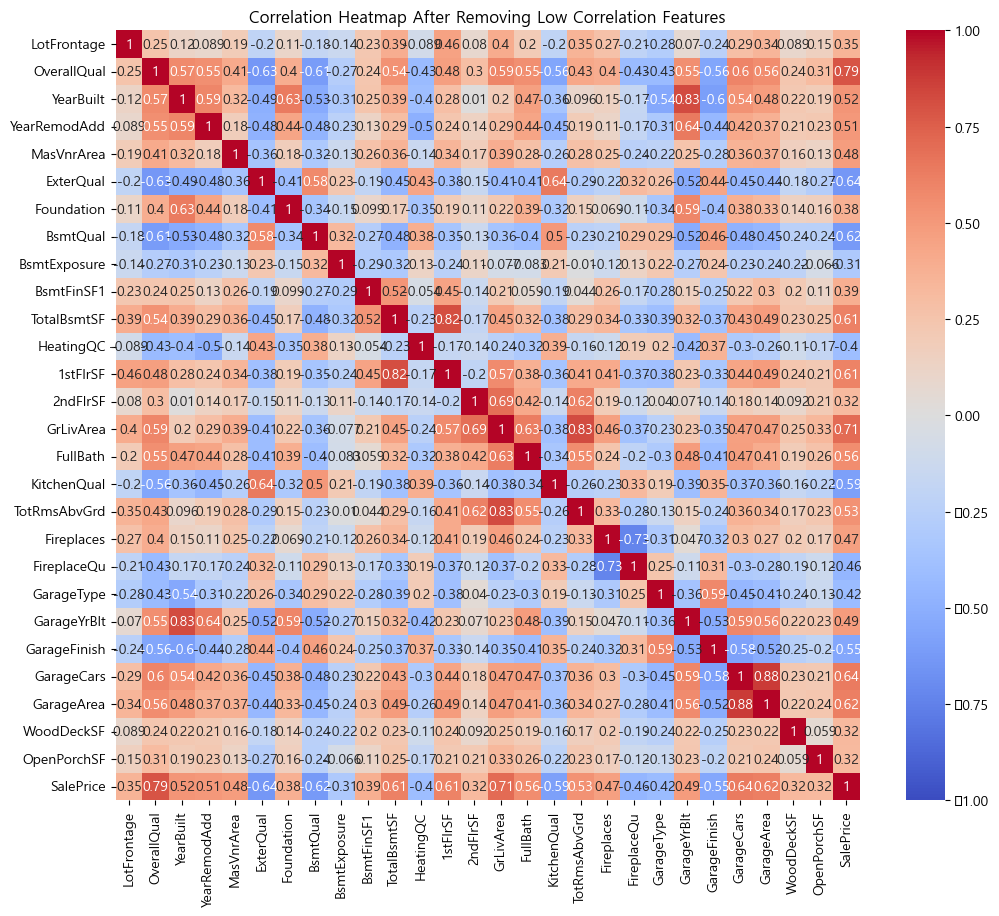

SalePrice와 상관관계가 낮은 변수들:
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr     0.168213
Fence            0.140640
Alley            0.139868
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
ScreenPorch      0.111447
Exterior2nd      0.103766
Exterior1st      0.103551
PoolArea         0.092404
Condition1       0.091155
MiscFeature      0.073609
LandSlope        0.051152
MoSold           0.046432
3SsnPorch        0.044584
Street           0.041036
GarageCond       0.025149
LandContour      0.015453
BsmtCond         0.015058
BsmtFinType2     0.008041
Condition2       0.007513
GarageQual       0.006861
BsmtFinSF2      -0.011378
Utilities       -0.014314
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id           

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터프레임에서 수치형 및 범주형 변수 분리
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 범주형 변수를 라벨 인코딩
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# 수치형 및 라벨 인코딩된 범주형 변수로 상관관계 계산
correlation_matrix = df_encoded.corr()
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

# 상관관계가 -0.3과 +0.3 사이인 변수 찾기
low_corr_cols = saleprice_corr[(saleprice_corr < 0.3) & (saleprice_corr > -0.3)].index

# 상관관계가 낮은 변수 제거
df_cleaned = df_encoded.drop(columns=low_corr_cols)
data2 = saleprice_corr[(saleprice_corr < 0.3) & (saleprice_corr > -0.3)]

# 수치형 및 범주형 변수들의 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap After Removing Low Correlation Features')
plt.show()

# SalePrice와의 상관계수 출력
print("SalePrice와 상관관계가 낮은 변수들:")
print(data2)


In [43]:
import pandas as pd

# 데이터프레임 로드
df = pd.read_csv('train.csv')

# 전체 데이터프레임에서 수치형 및 범주형 변수 모두 포함하여 상관관계 계산
# 범주형 변수를 제외하고 수치형 변수만 사용
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# 상관관계 계산
correlation_matrix = df_numeric.corr()

# SalePrice와의 상관관계 추출 및 정렬
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

# 상관관계가 -0.3과 +0.3 사이인 변수 찾기
low_corr_cols = saleprice_corr[(saleprice_corr < 0.3) & (saleprice_corr > -0.3)].index

# 상관관계가 낮은 변수 제거
df_cleaned = df.drop(columns=low_corr_cols)

# 상관관계가 낮은 변수 출력
data2 = saleprice_corr[(saleprice_corr < 0.3) & (saleprice_corr > -0.3)]

# SalePrice와의 상관계수 출력
print("SalePrice와 상관관계가 낮은 변수들:")
print(data2)



SalePrice와 상관관계가 낮은 변수들:
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [44]:
# 상관관계가 낮은 변수들의 이름 출력
low_corr_feature_names = data2.index
print("상관관계가 낮은 변수들:")
print(low_corr_feature_names)


상관관계가 낮은 변수들:
Index(['HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

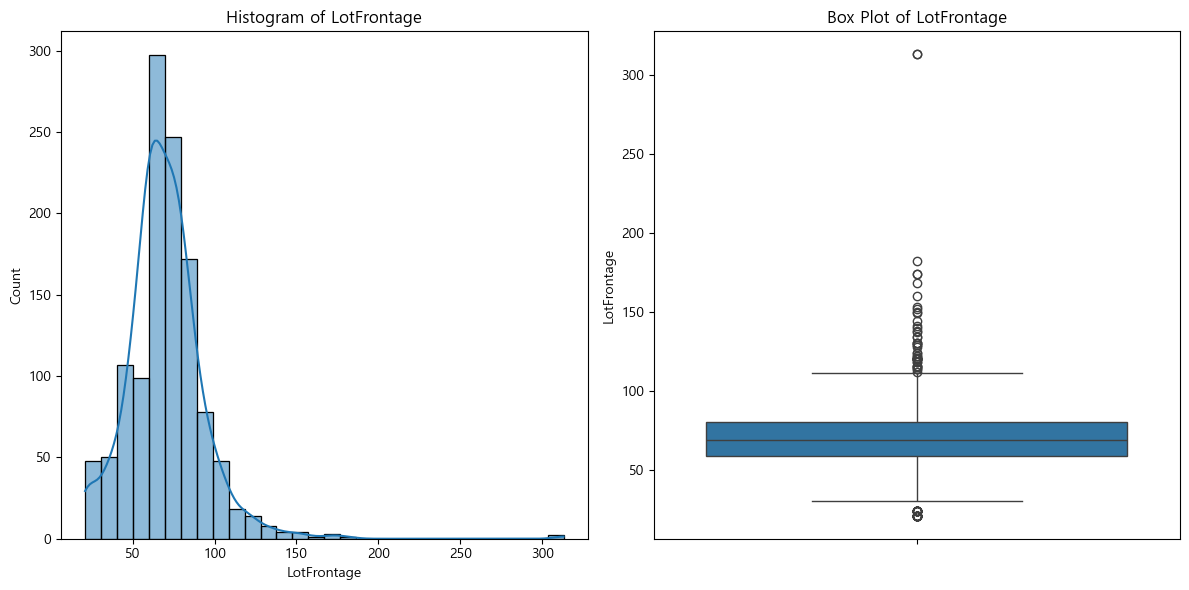

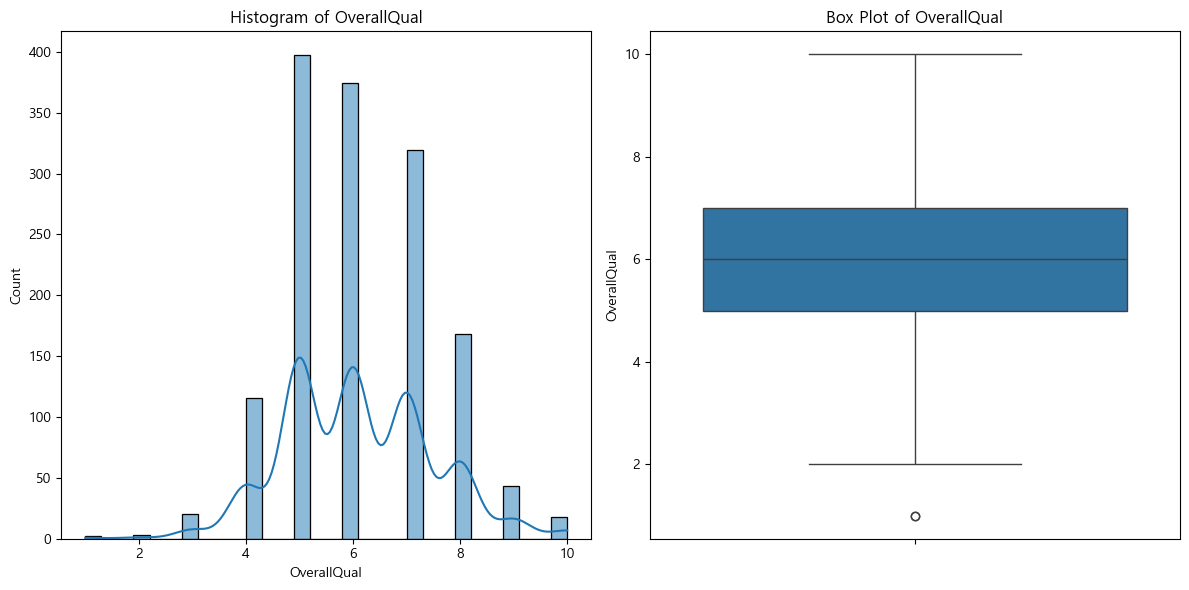

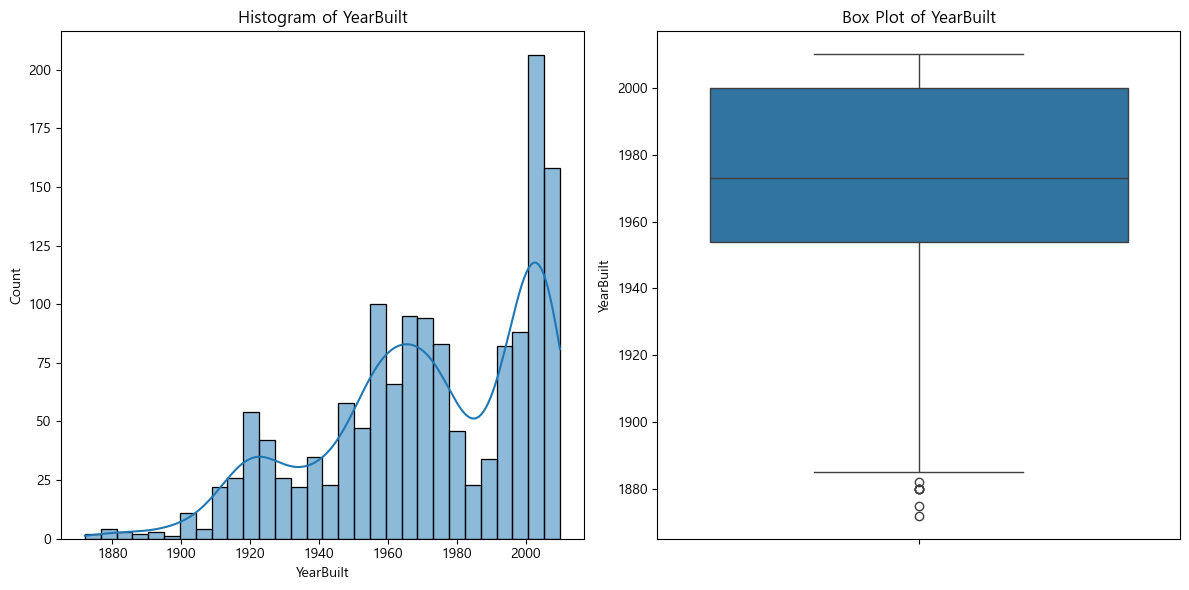

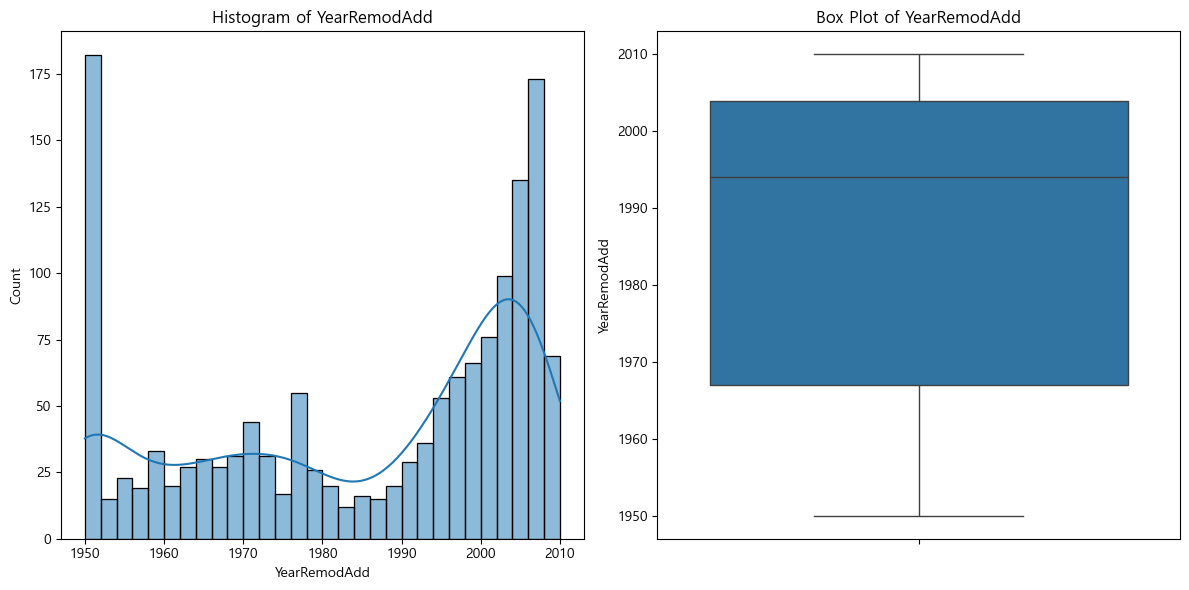

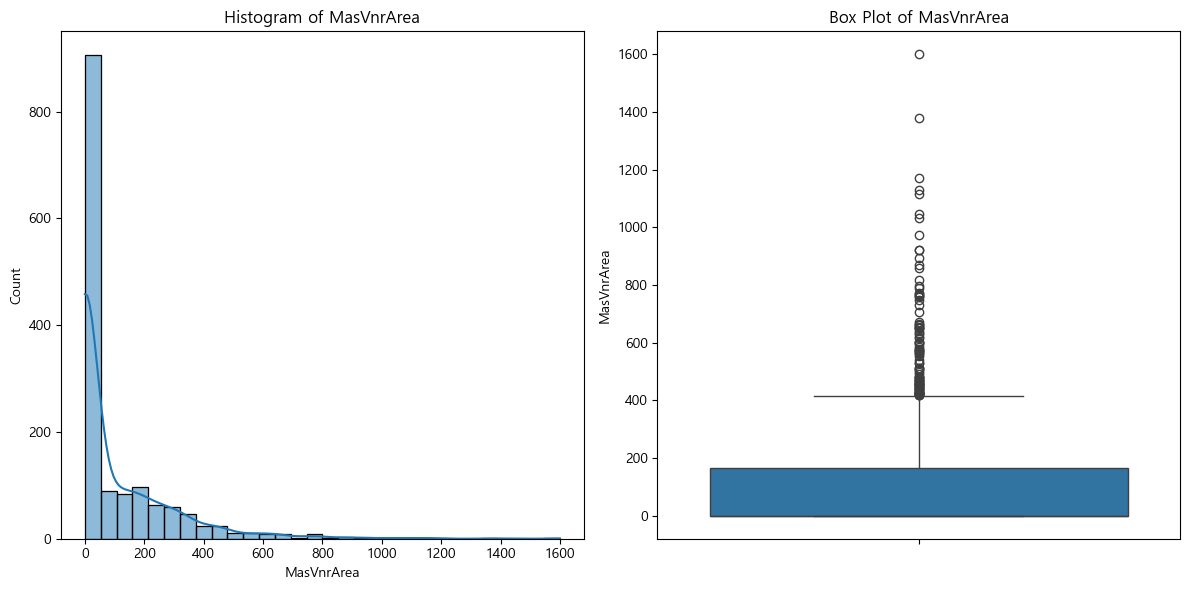

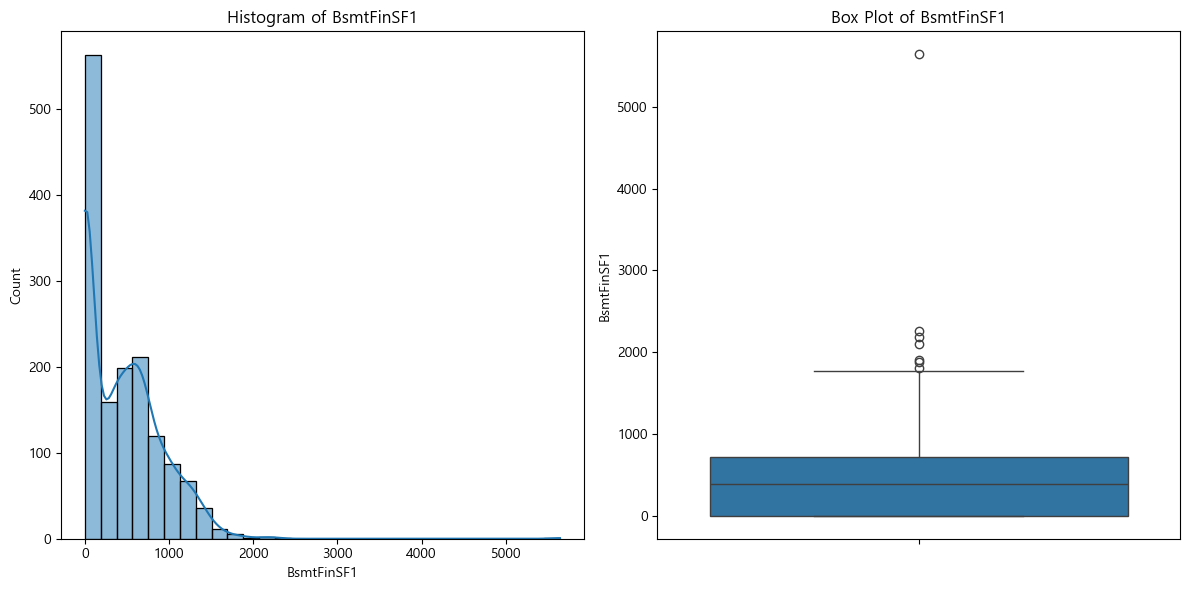

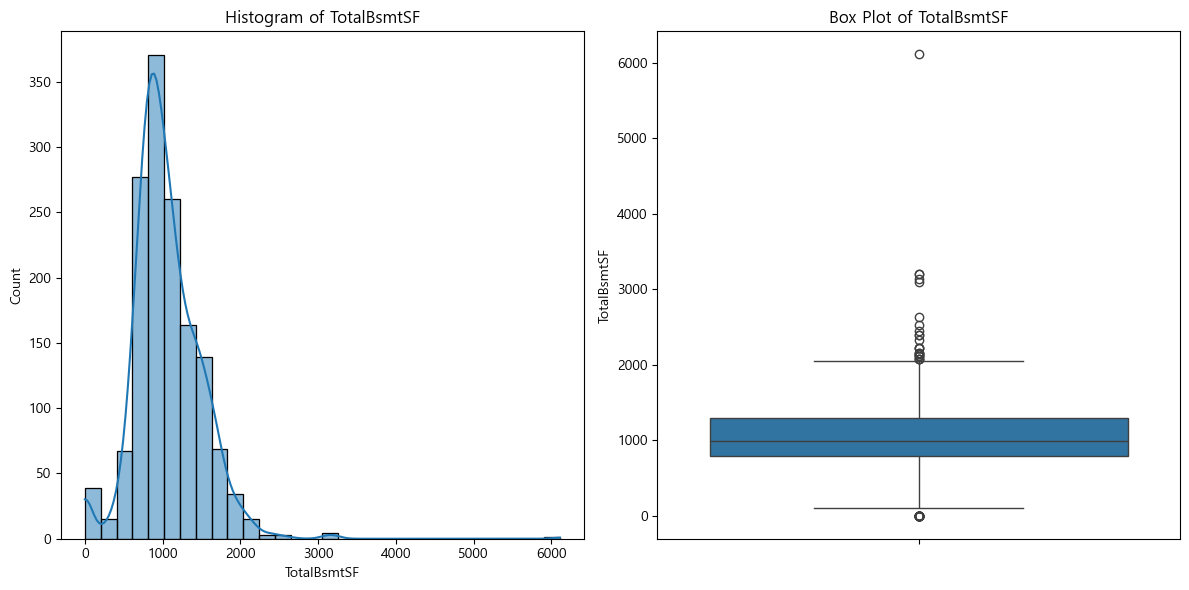

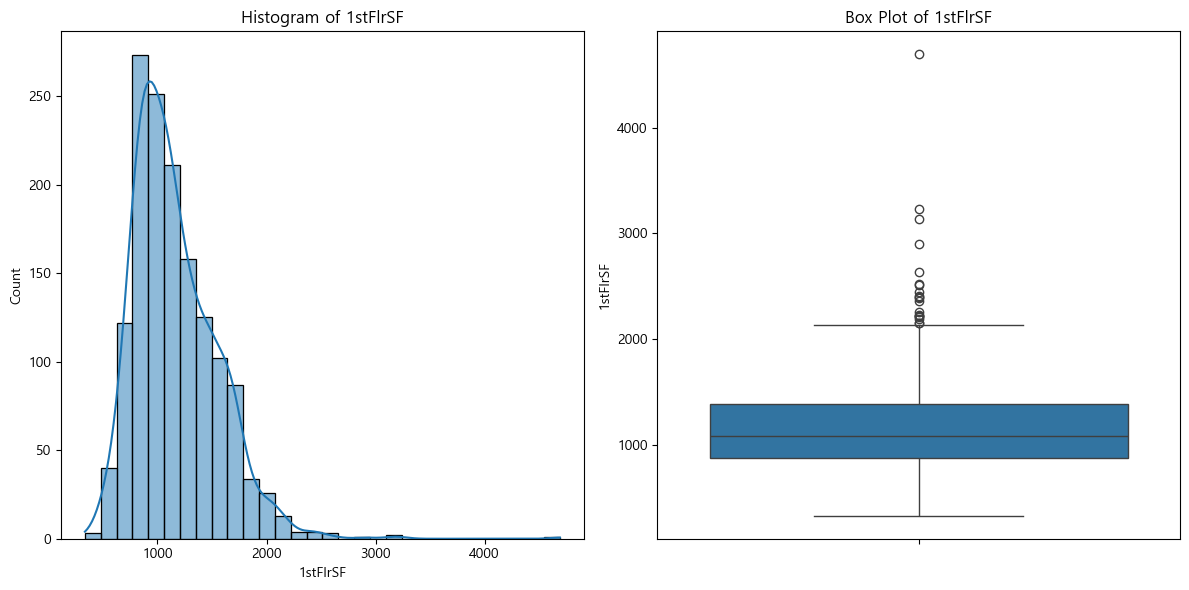

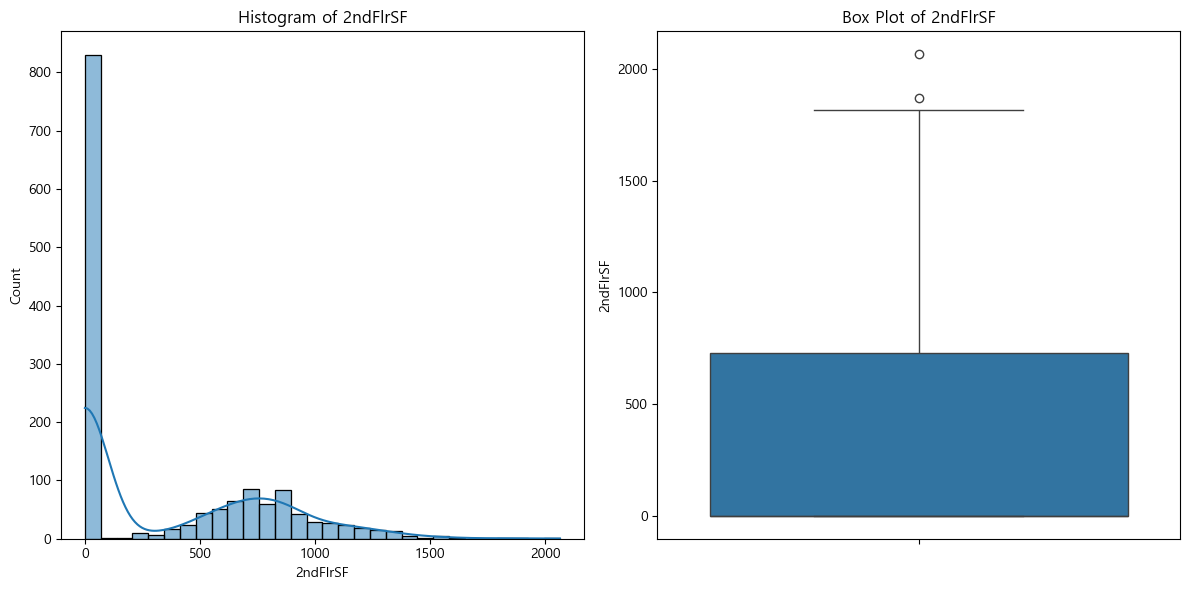

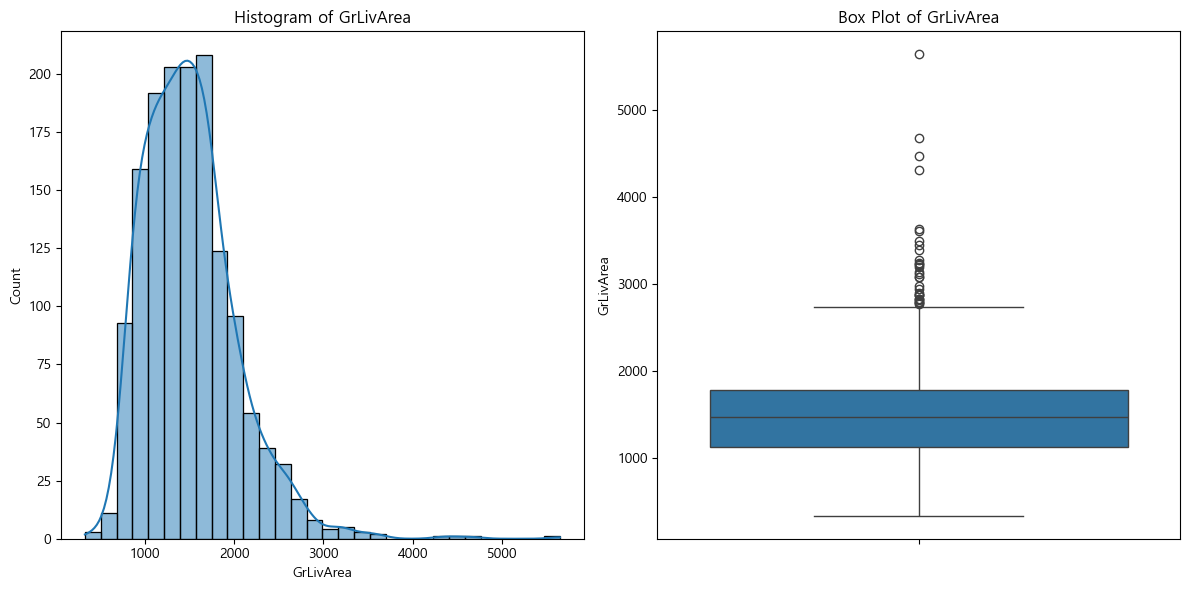

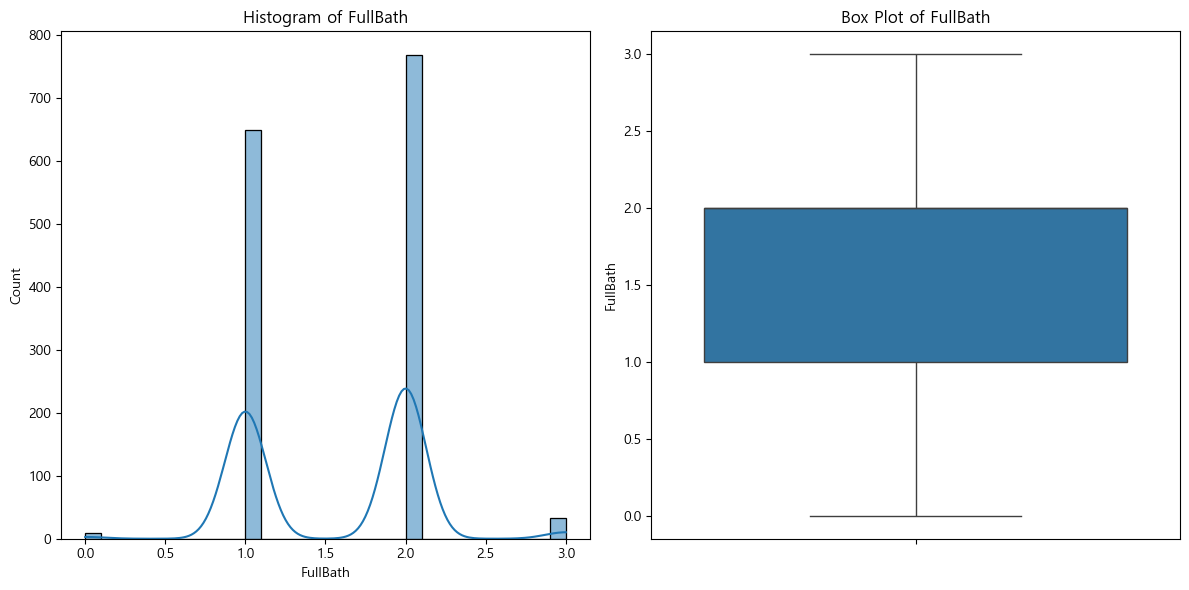

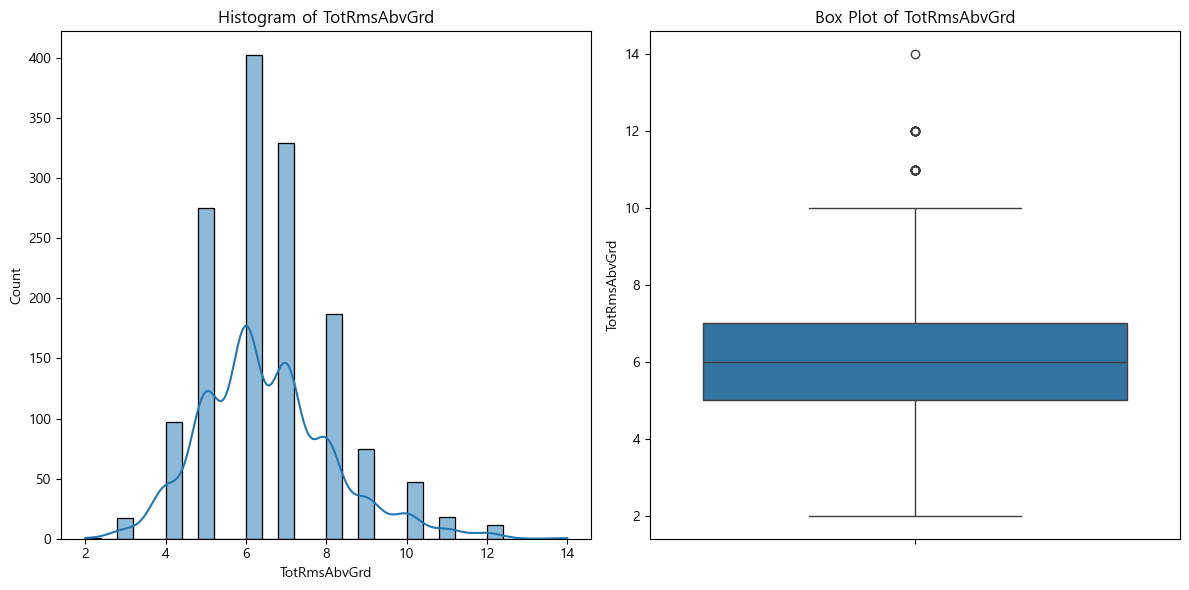

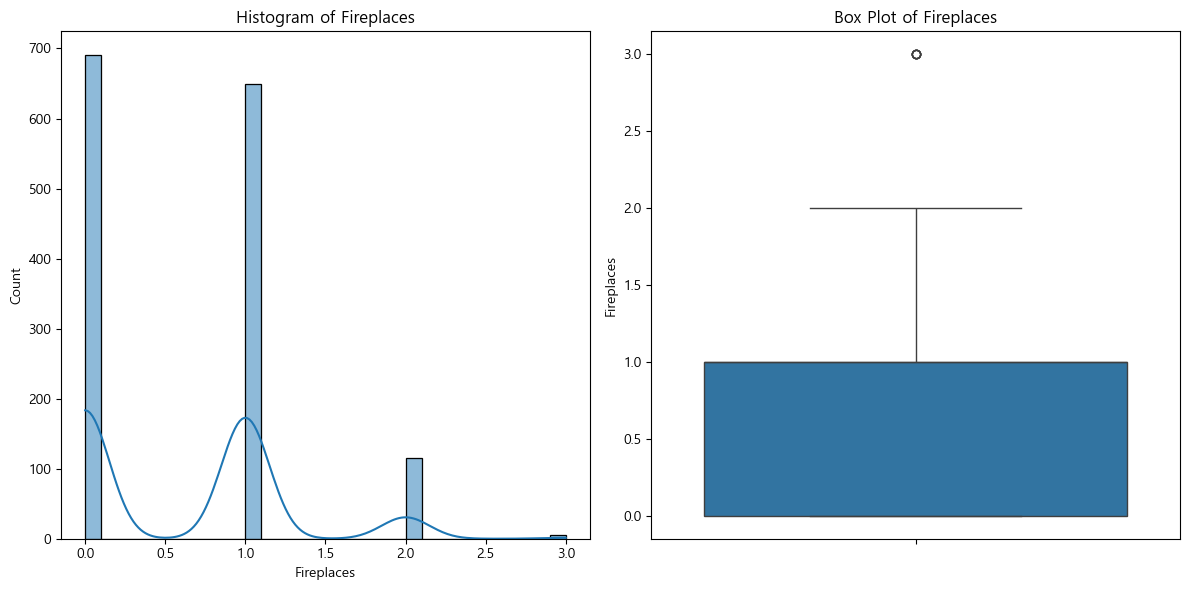

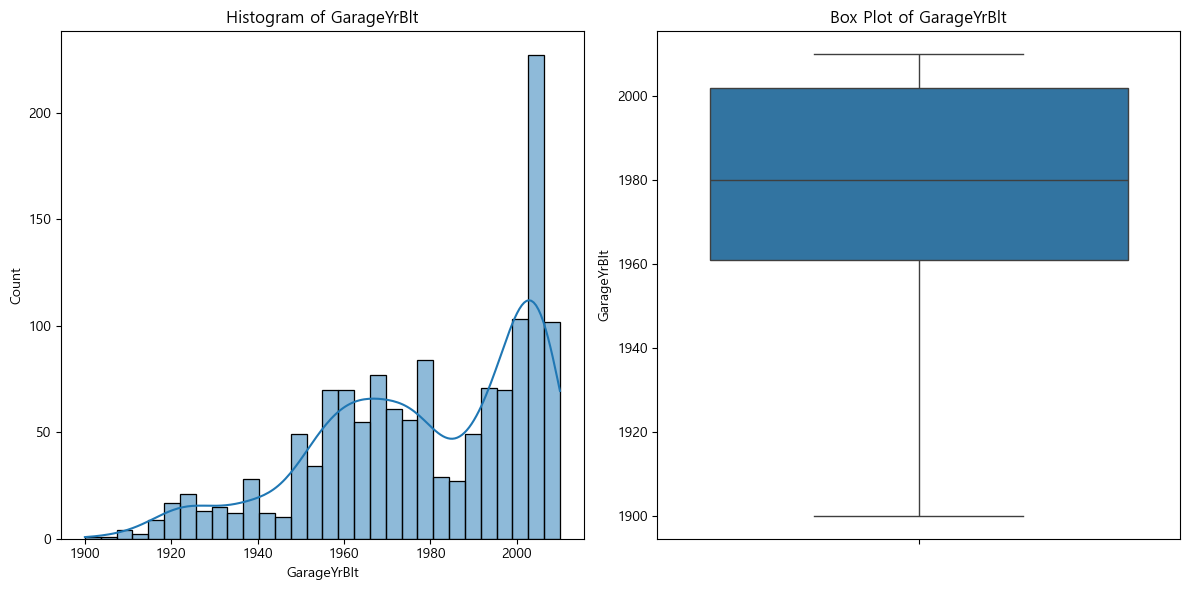

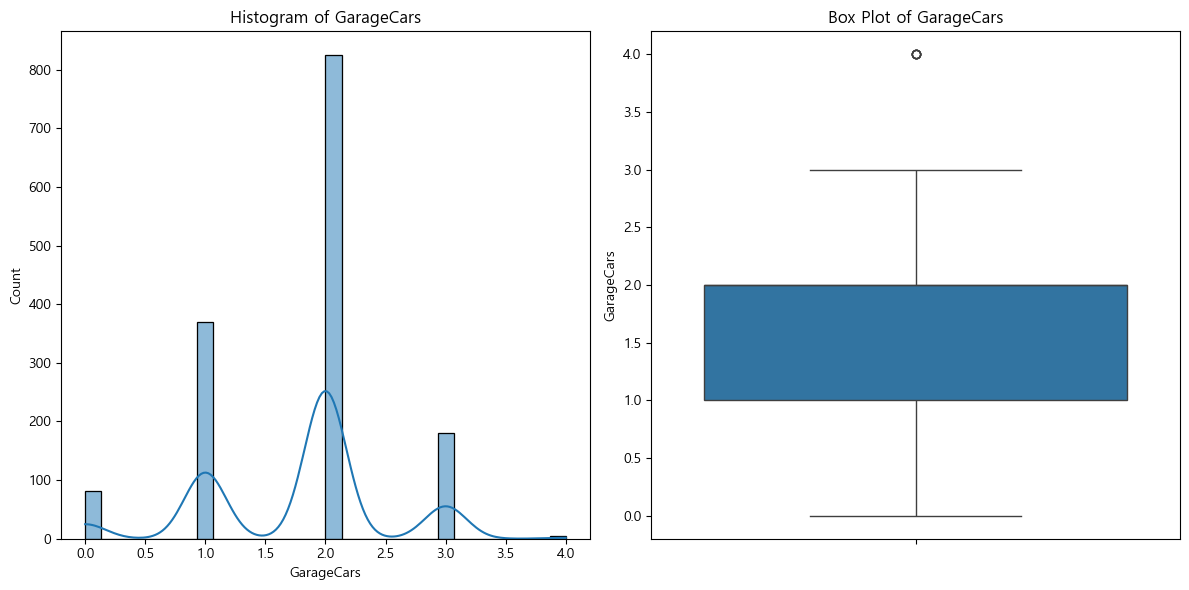

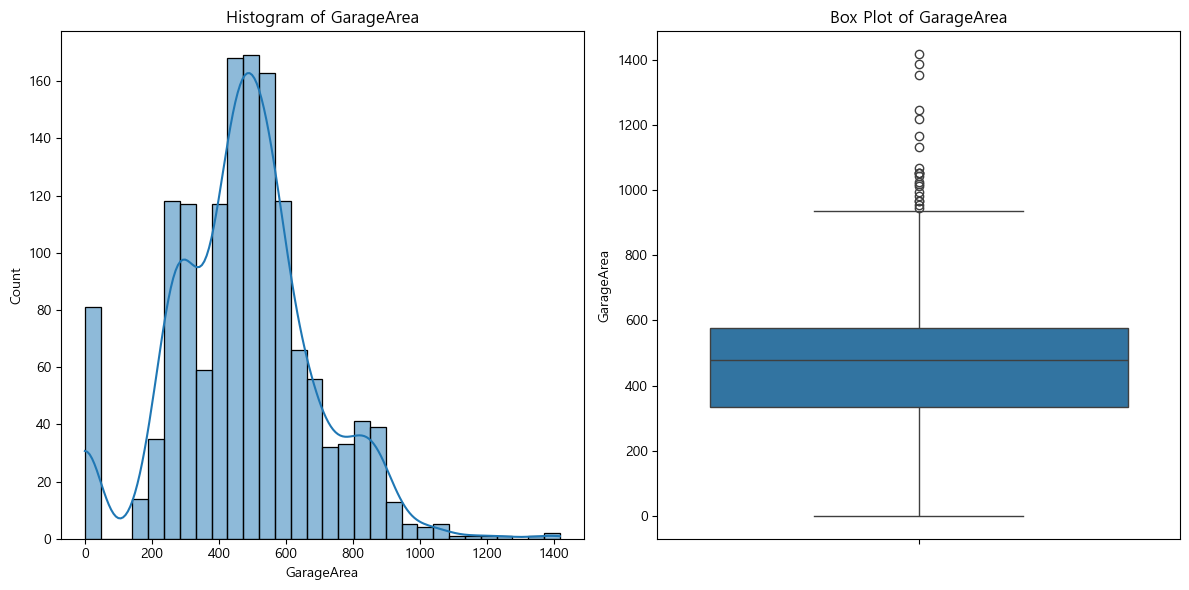

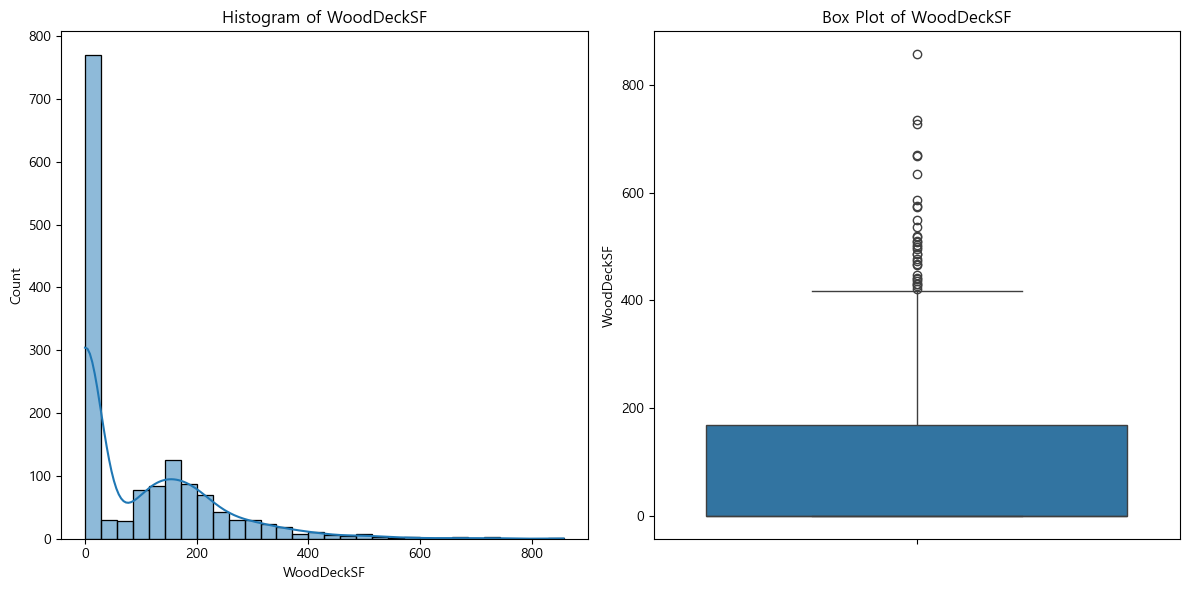

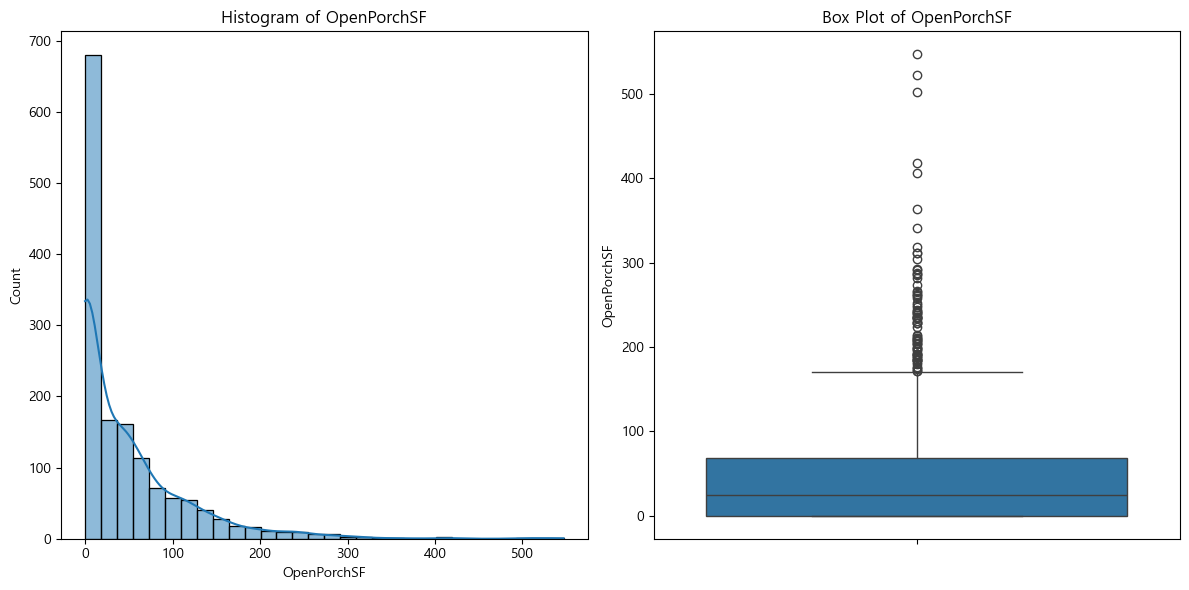

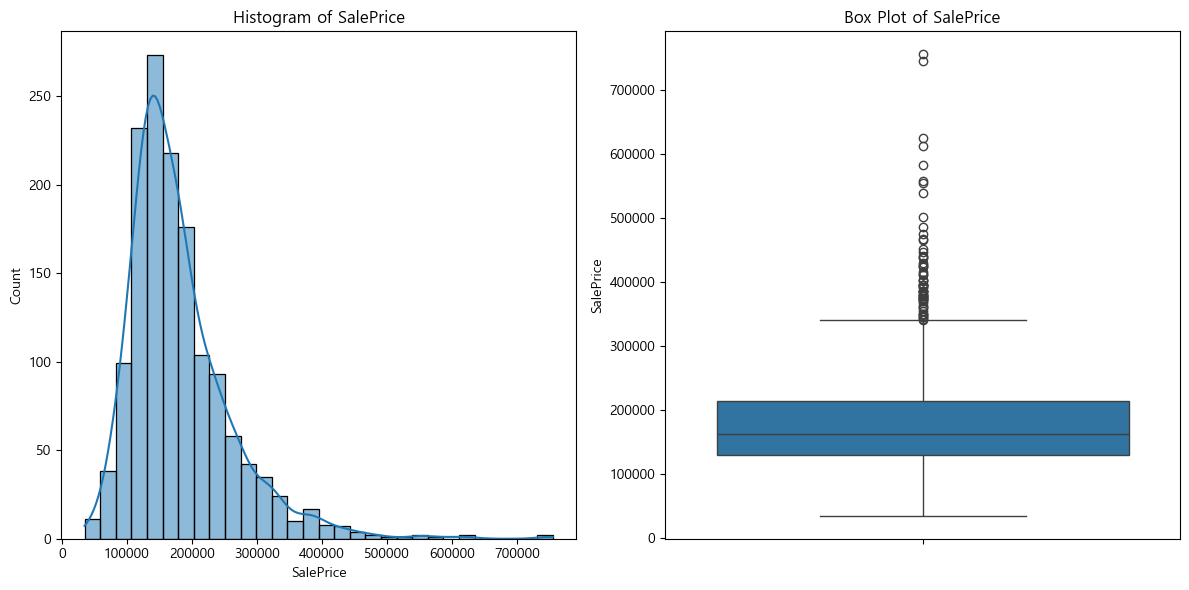

In [47]:
# df_cleaned에서 수치형 변수만 선택
numeric_cols_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# 각 수치형 변수마다 figure 생성
for col in numeric_cols_cleaned:
    plt.figure(figsize=(12, 6))
    
    # 히스토그램 (왼쪽)
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    # 상자 그림 (오른쪽)
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

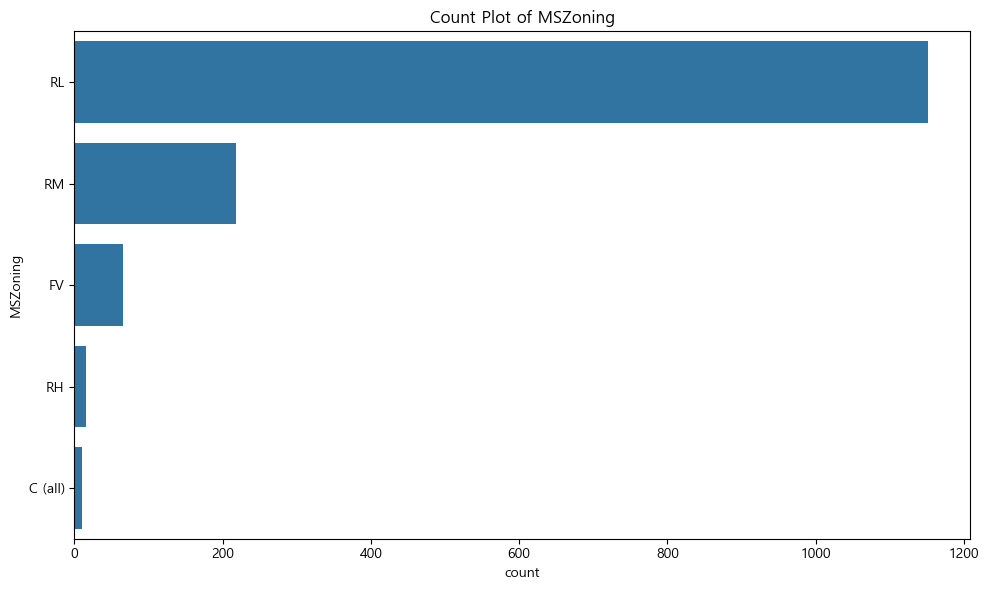

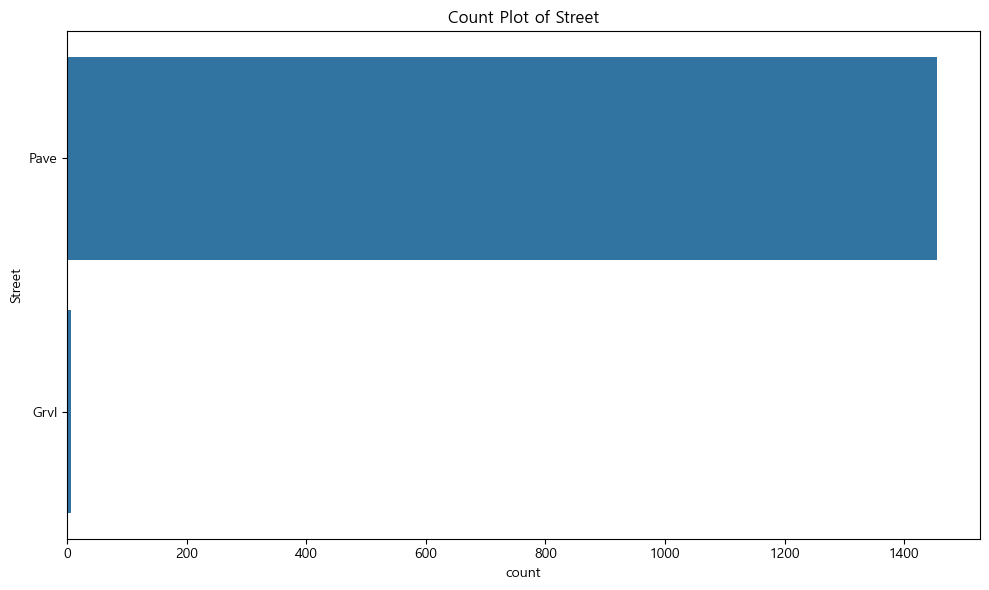

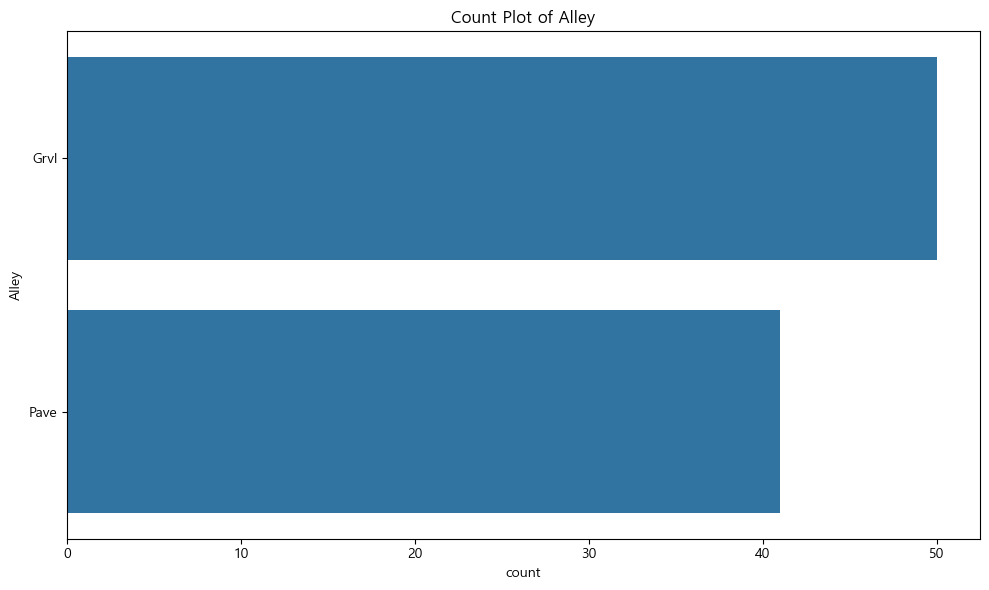

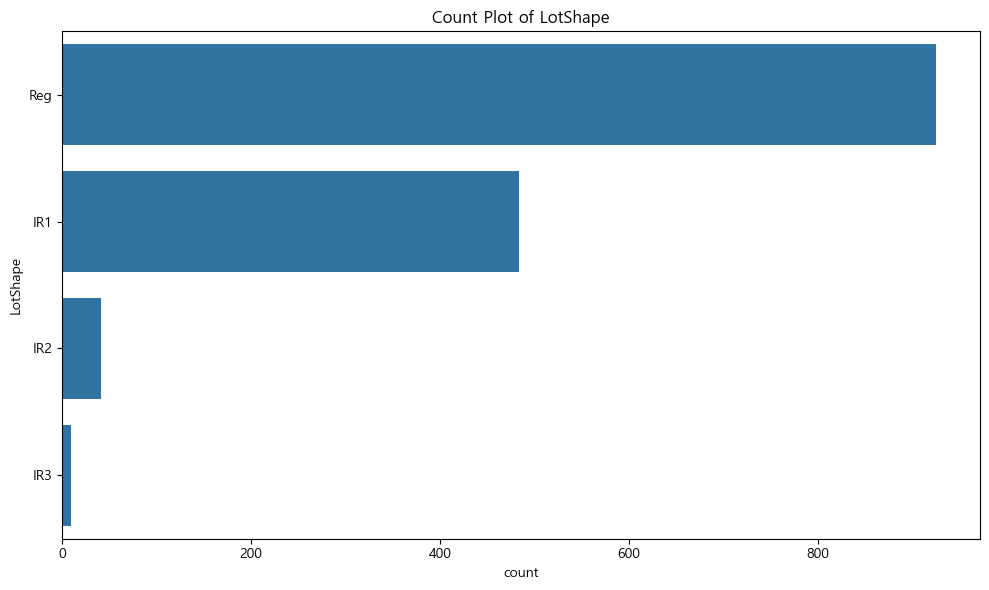

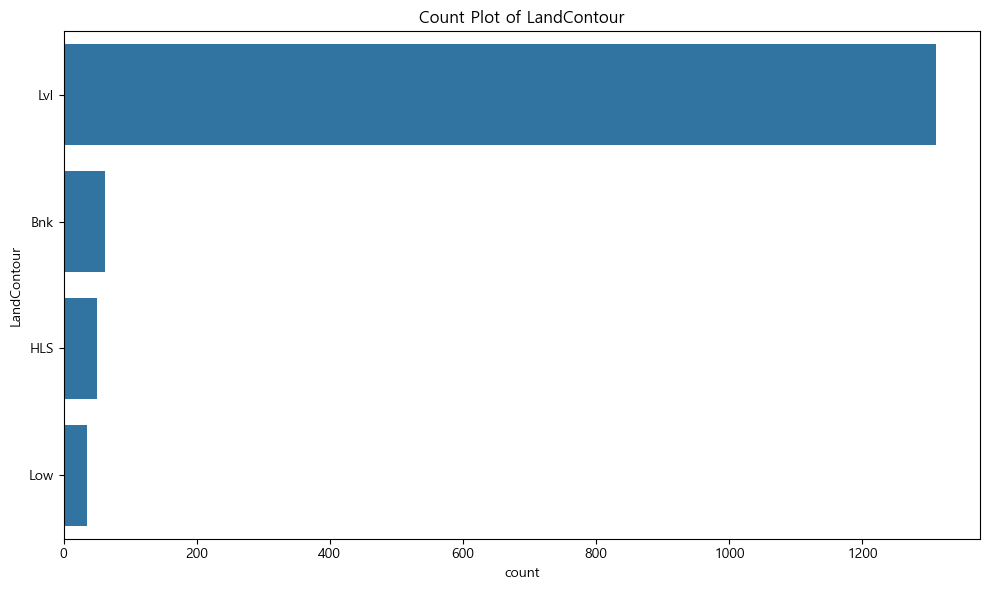

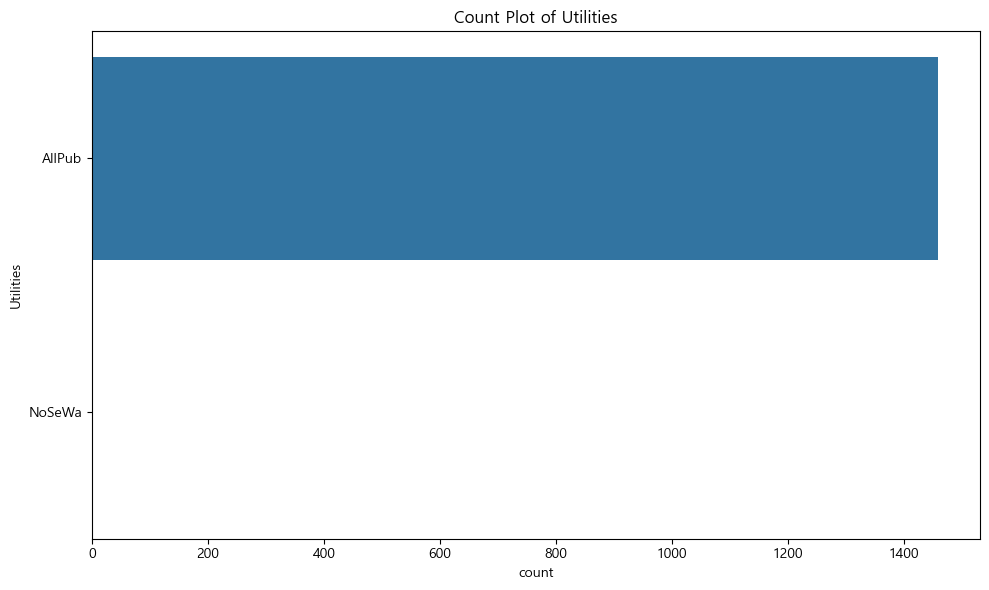

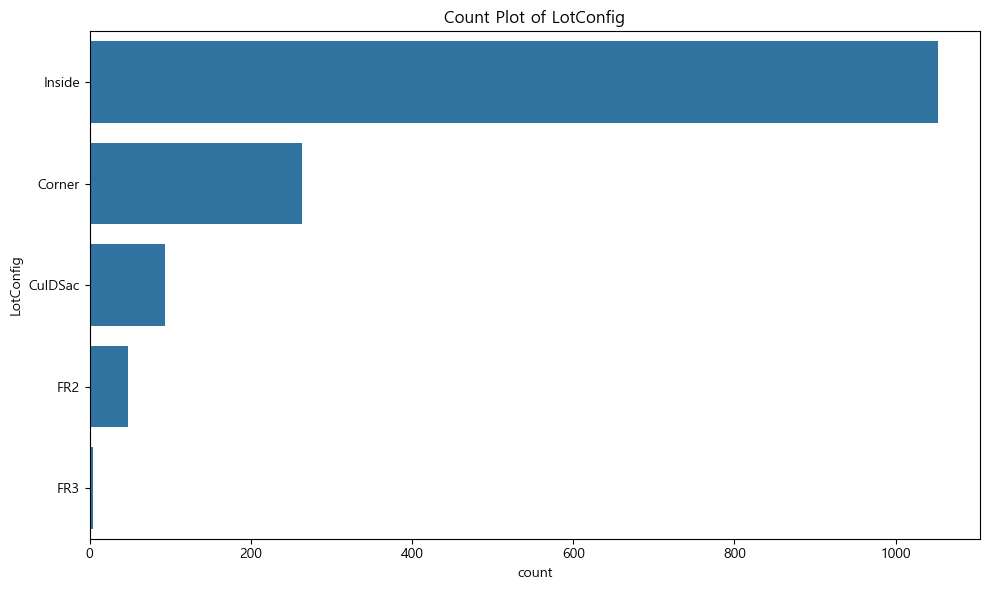

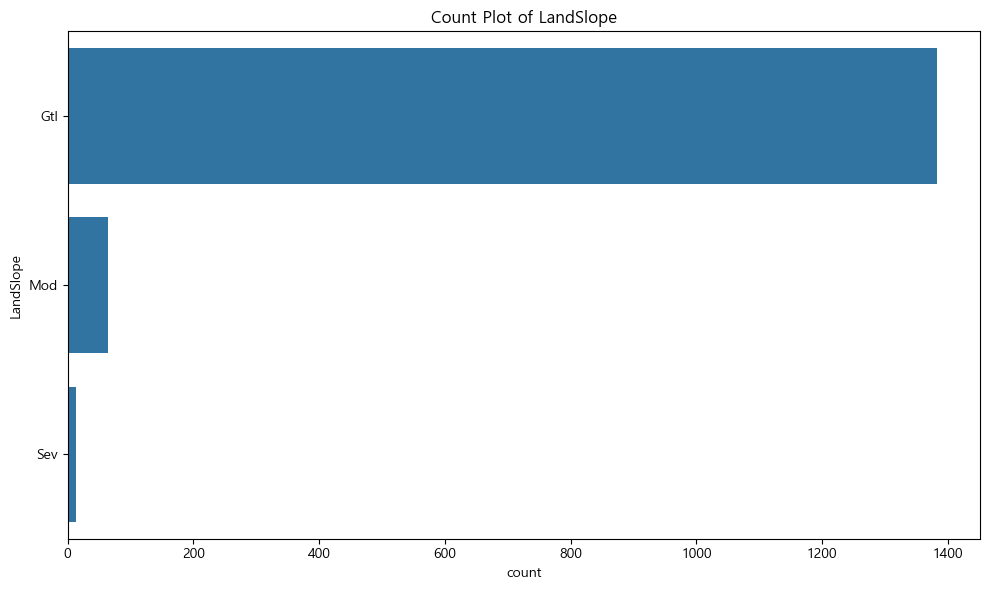

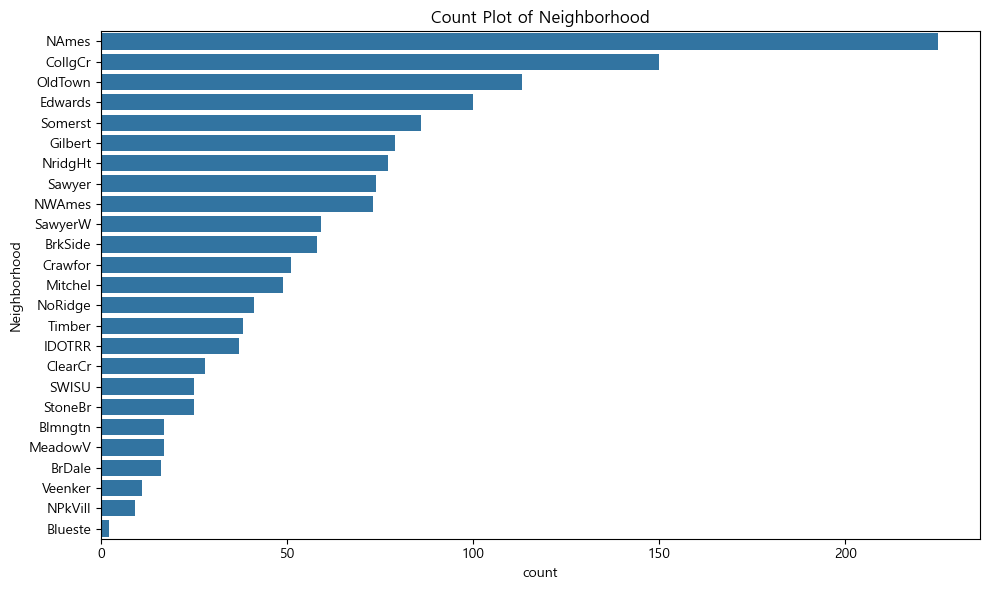

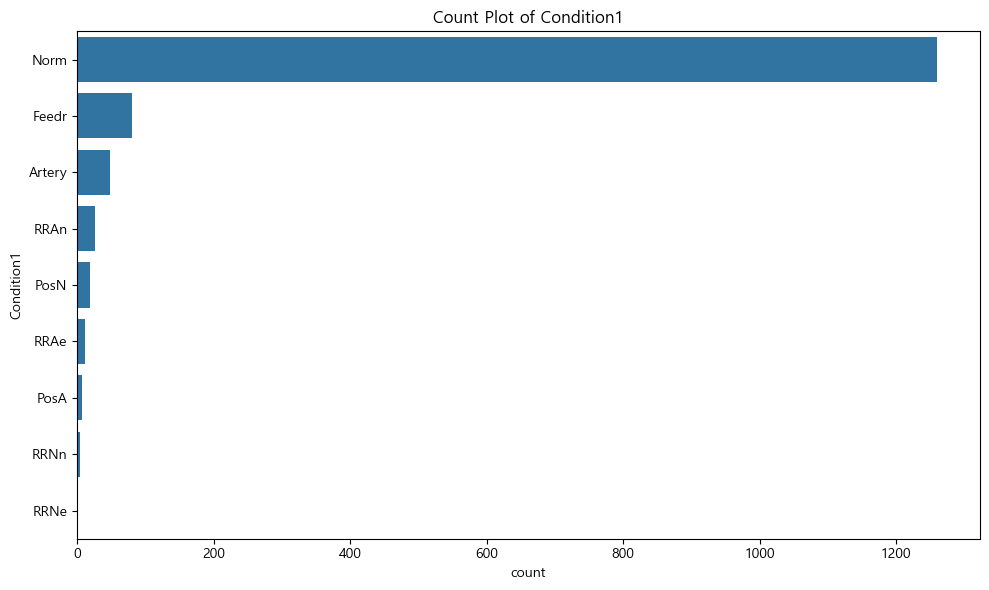

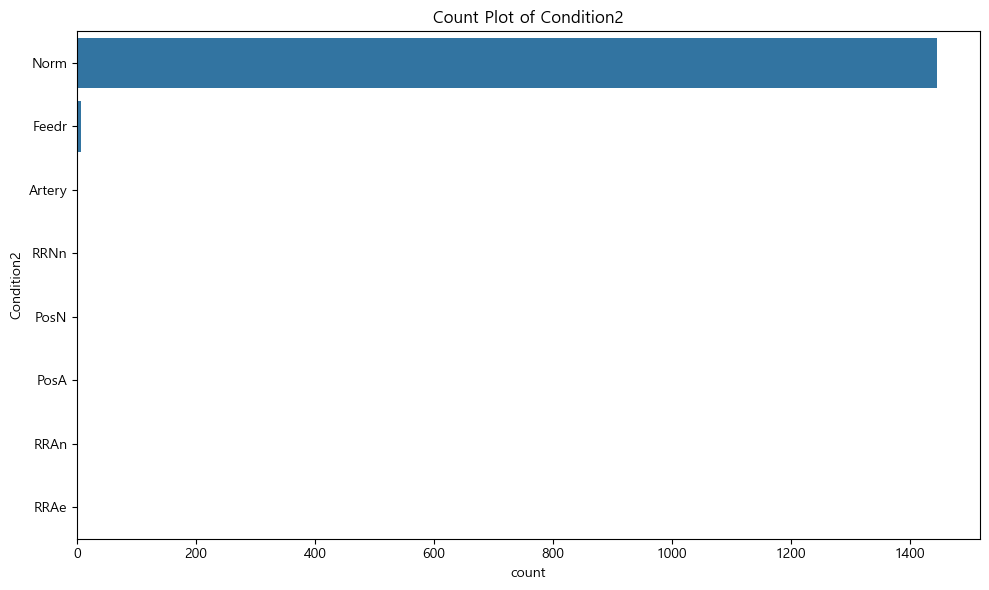

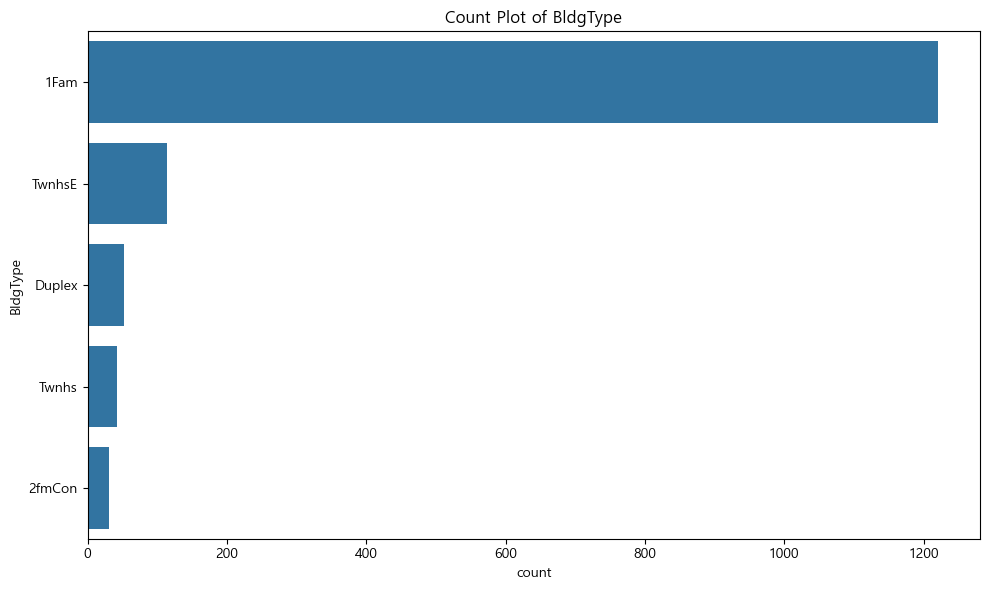

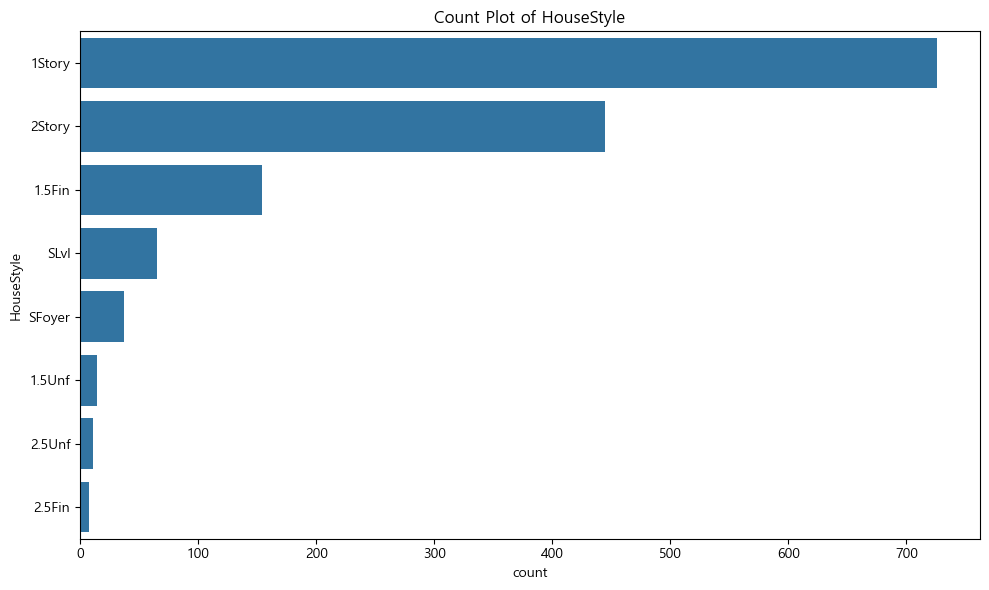

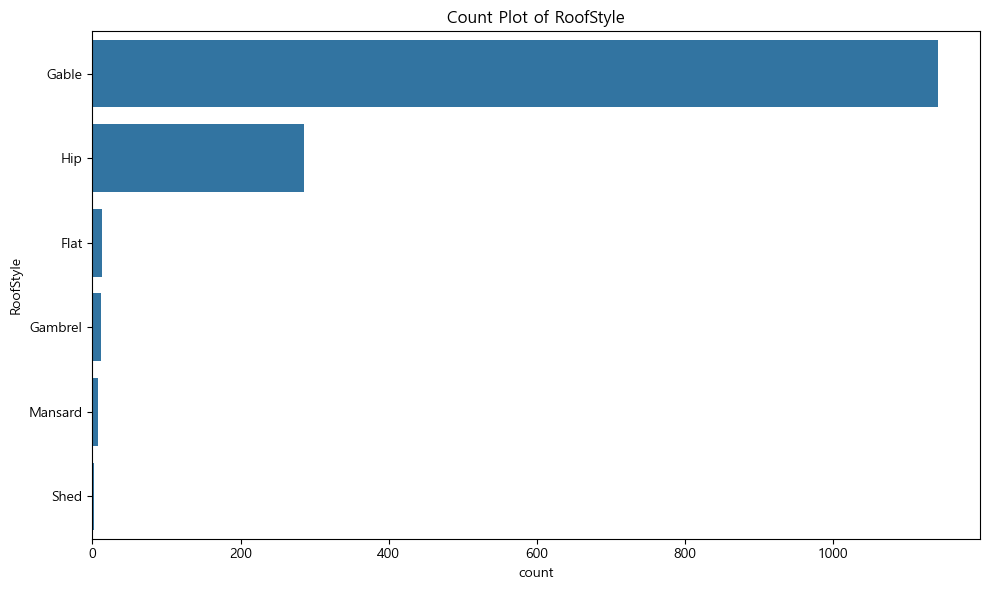

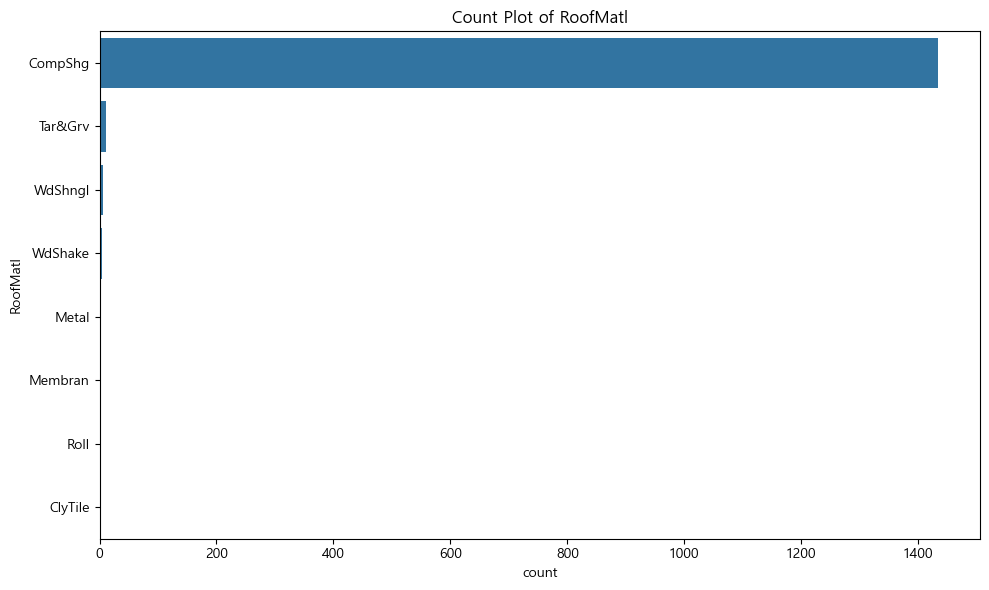

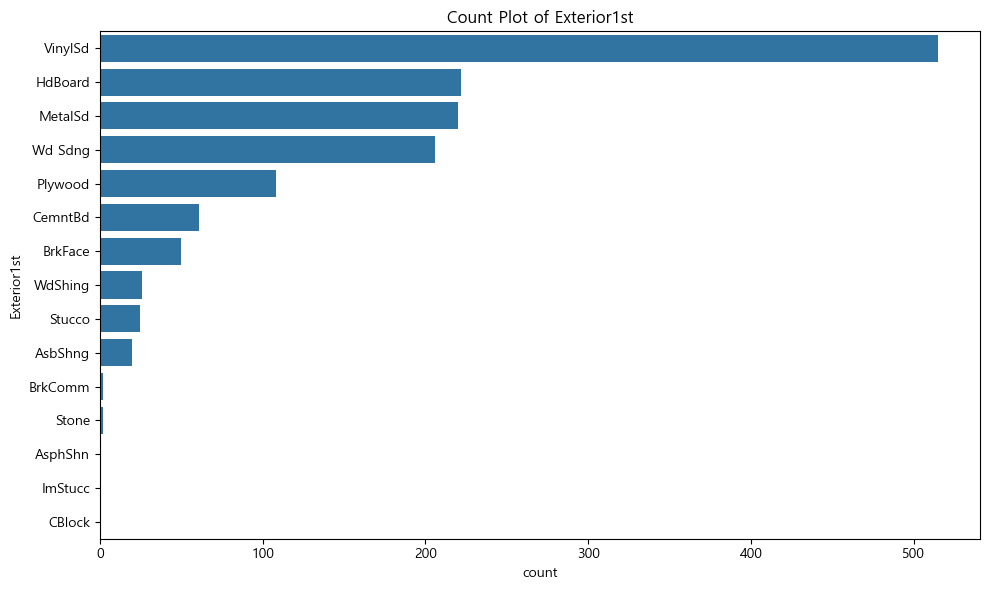

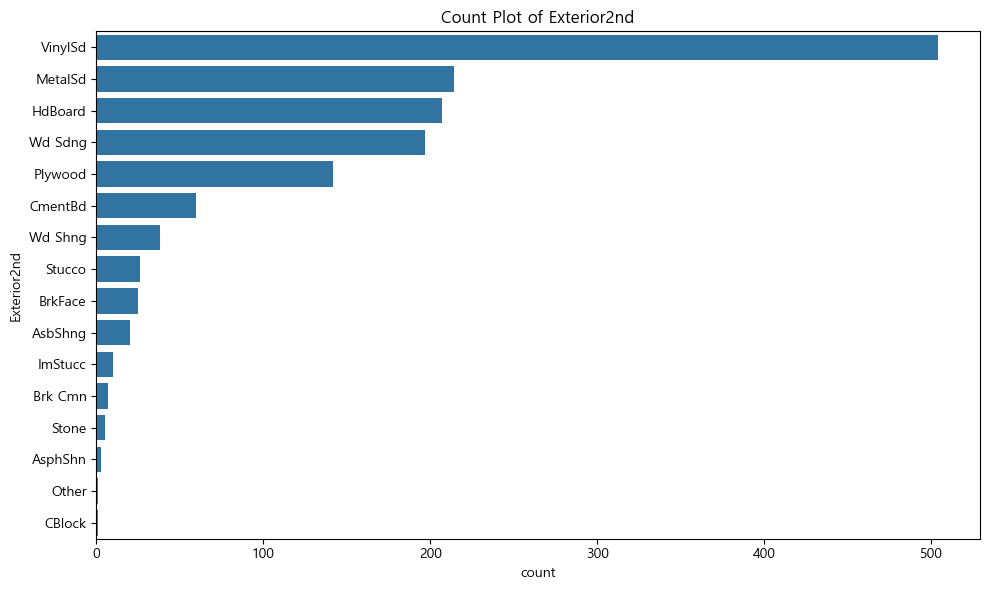

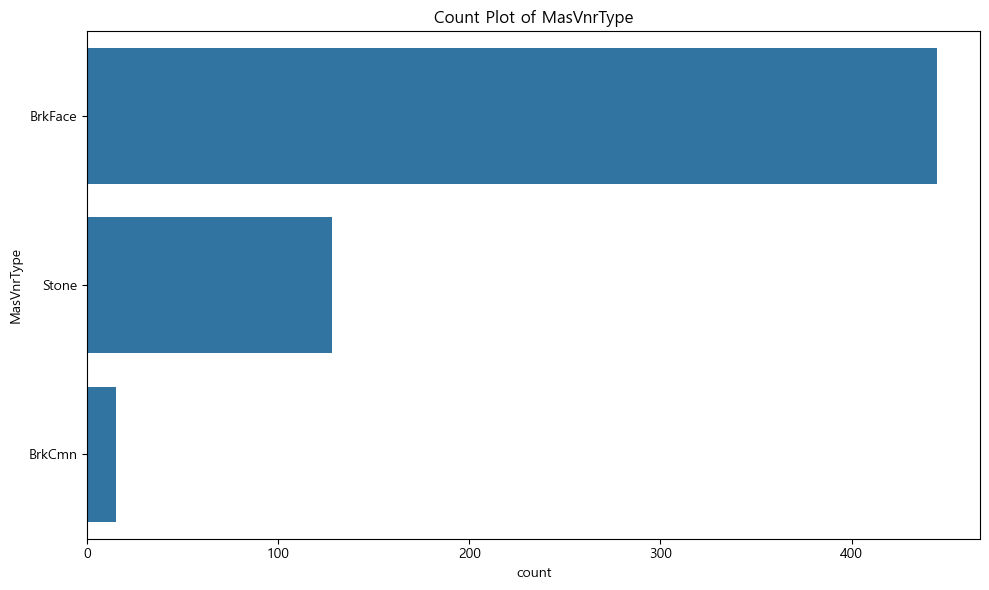

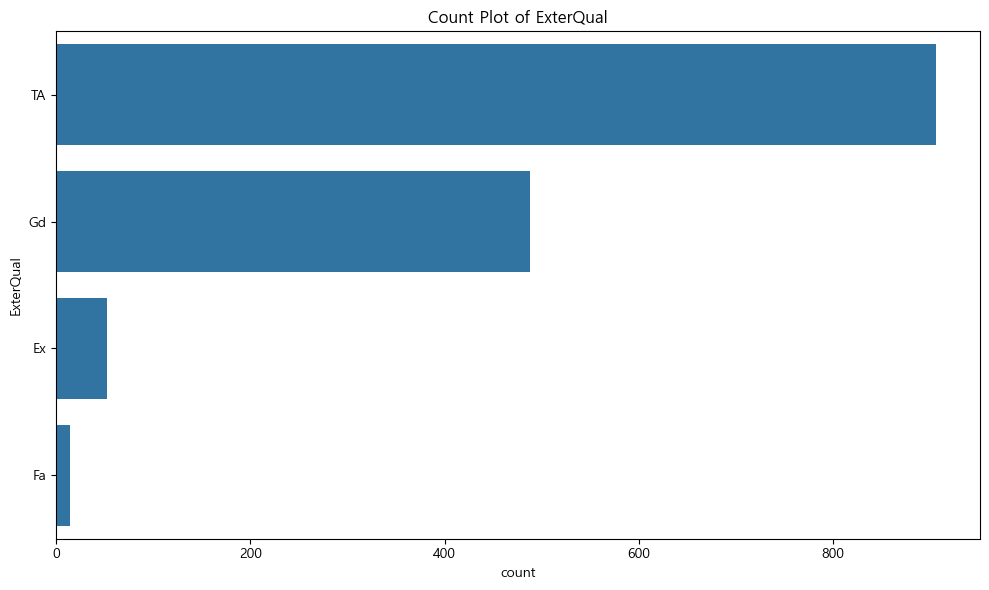

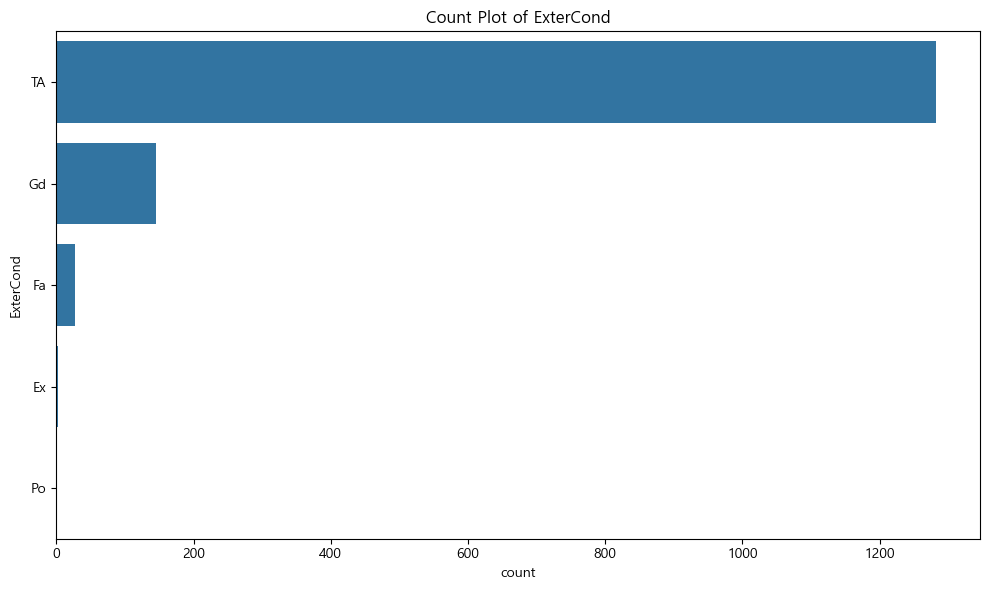

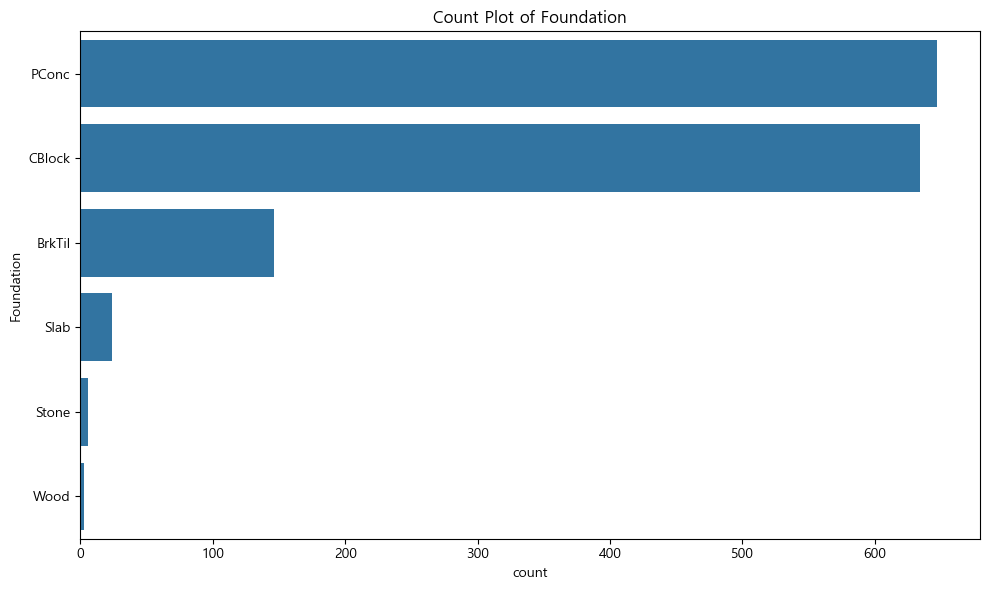

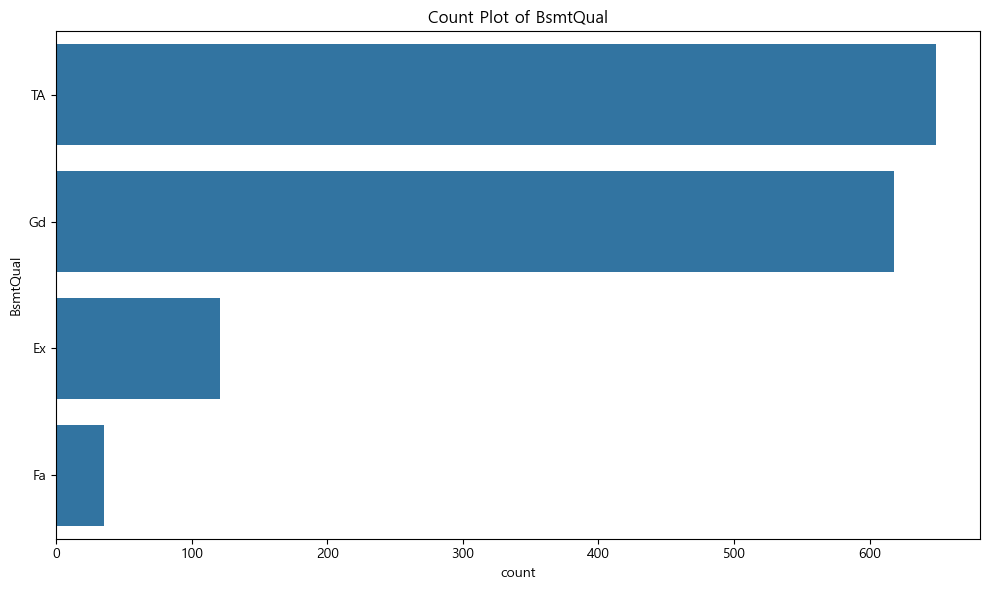

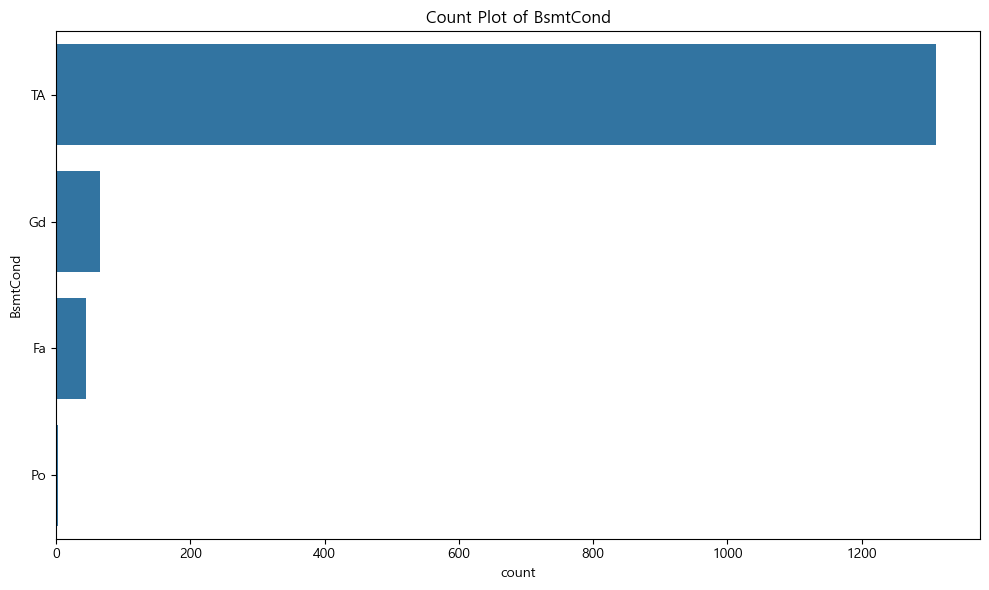

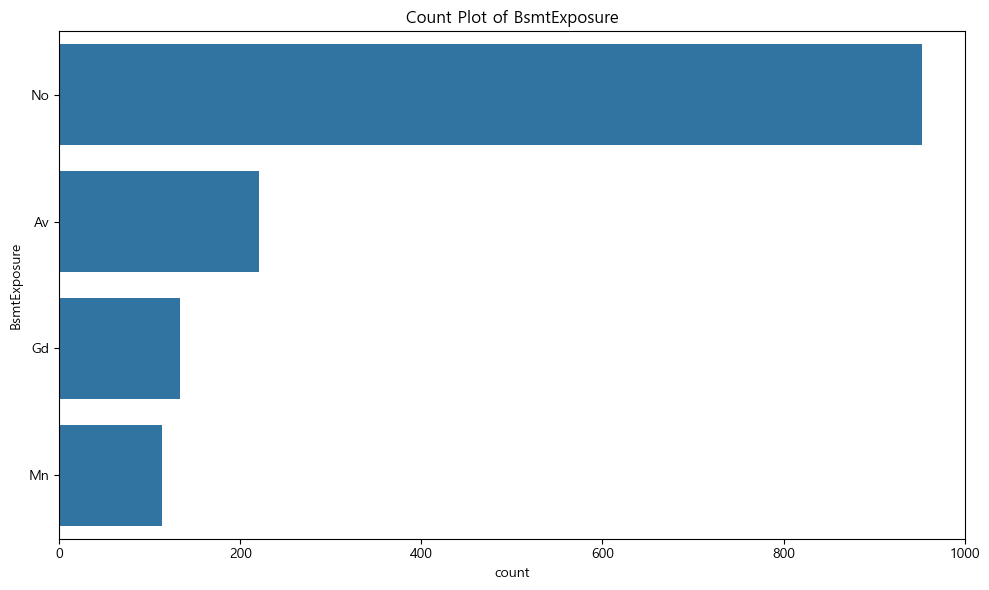

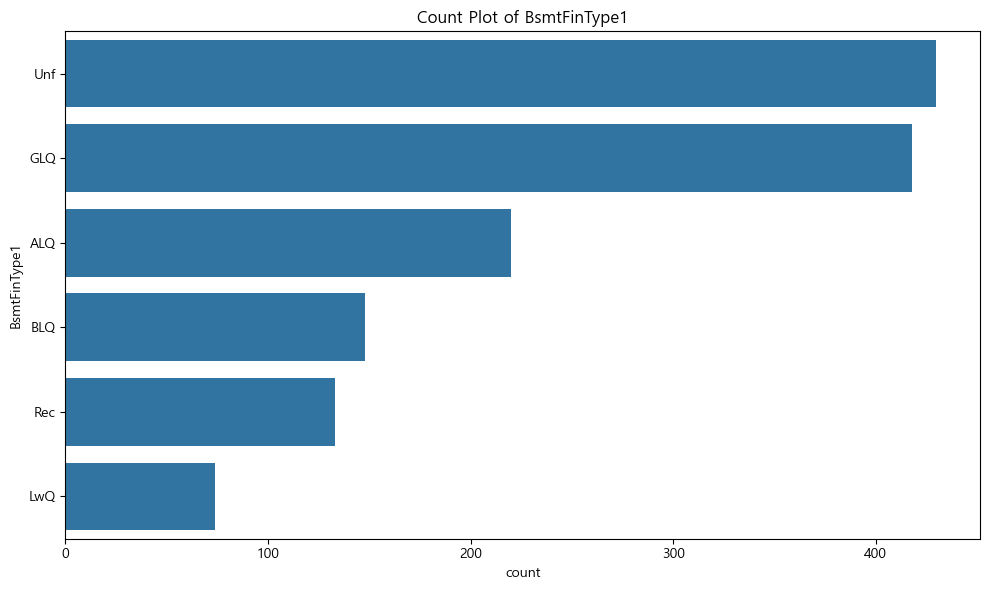

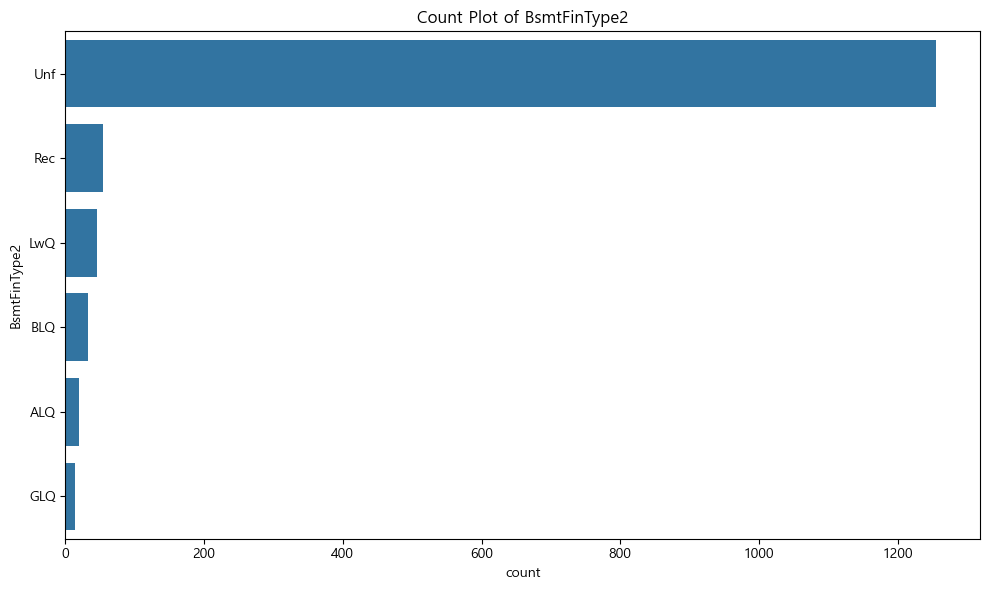

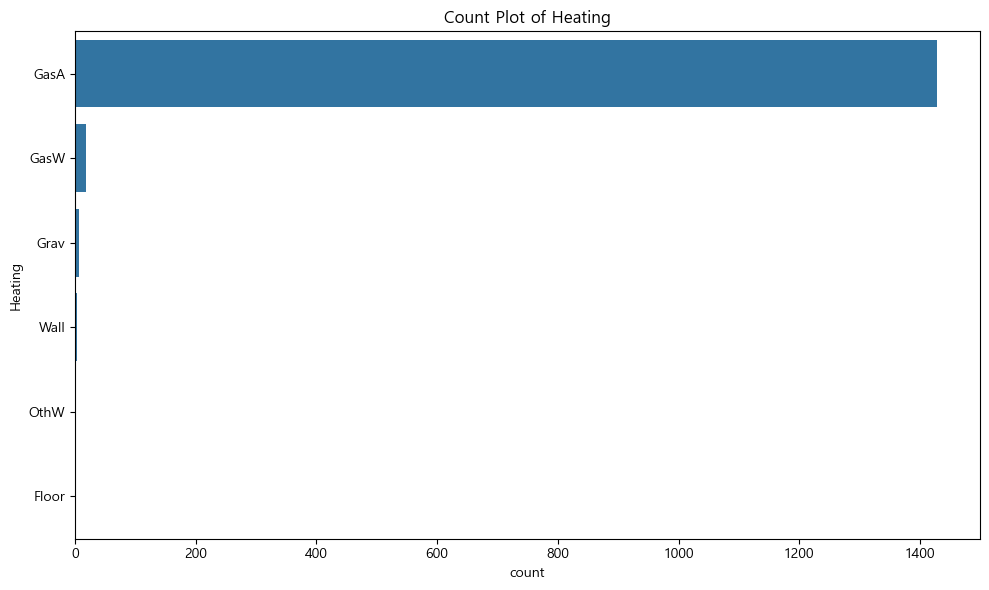

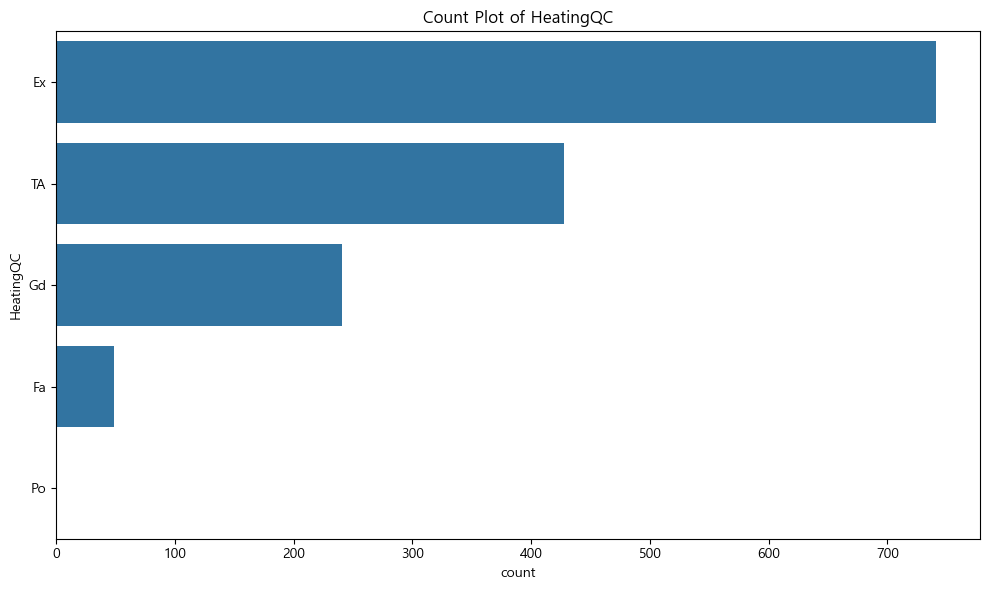

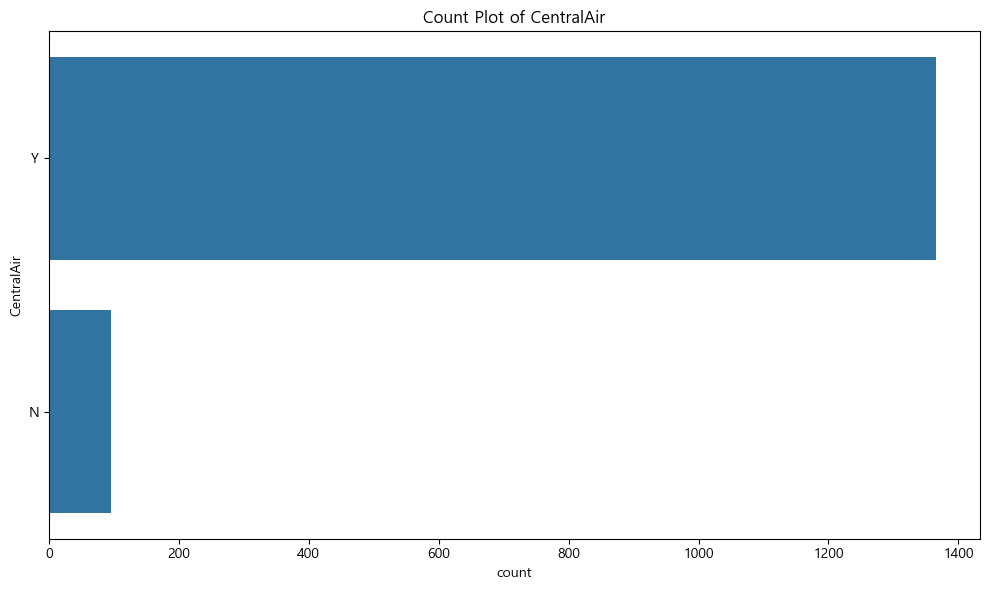

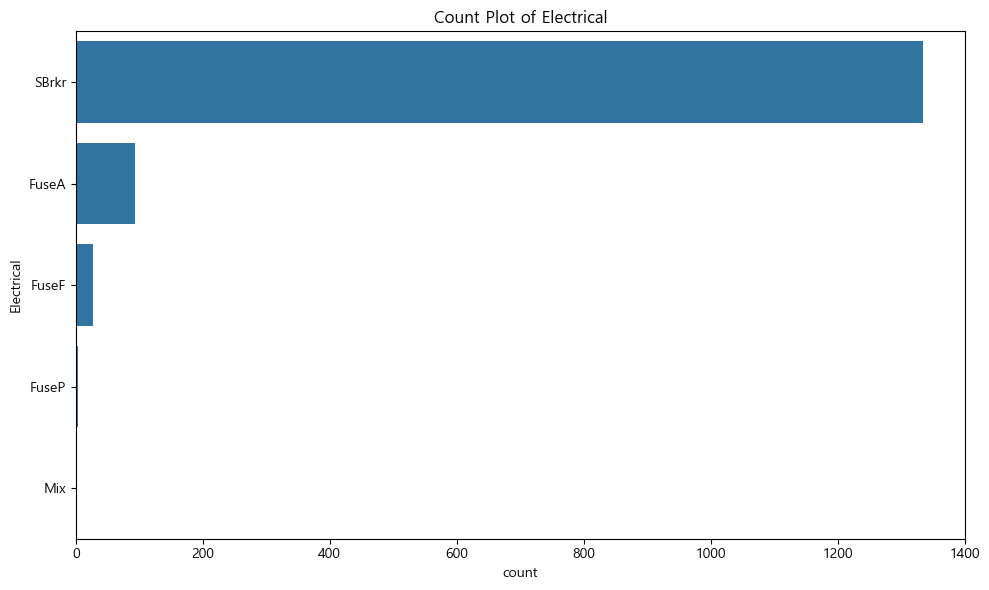

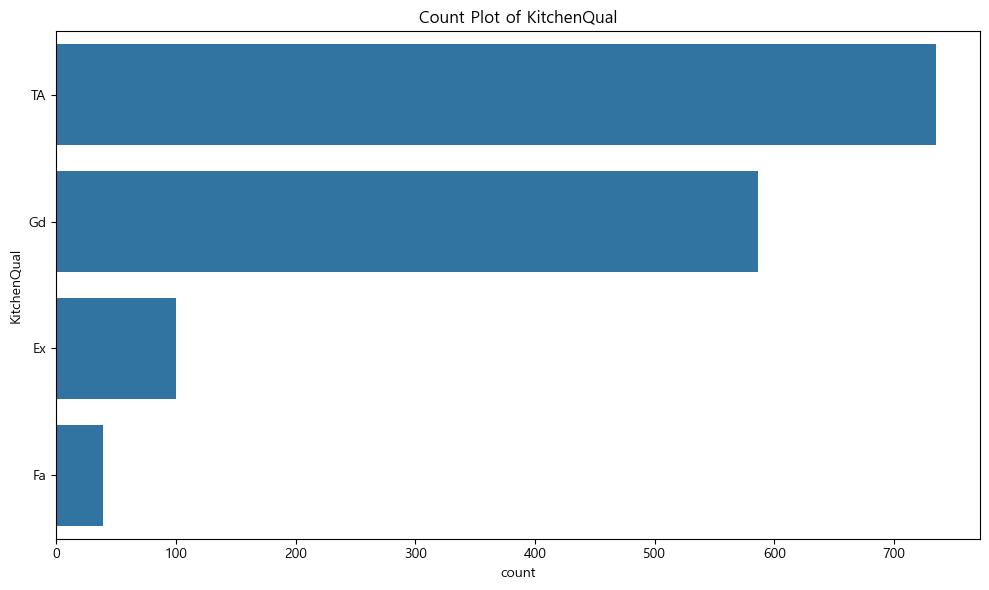

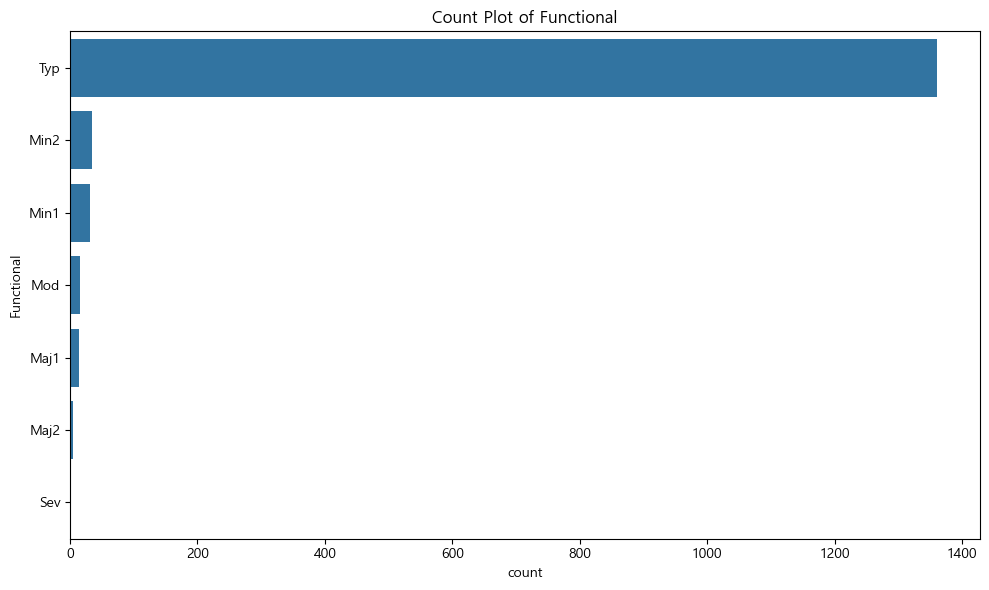

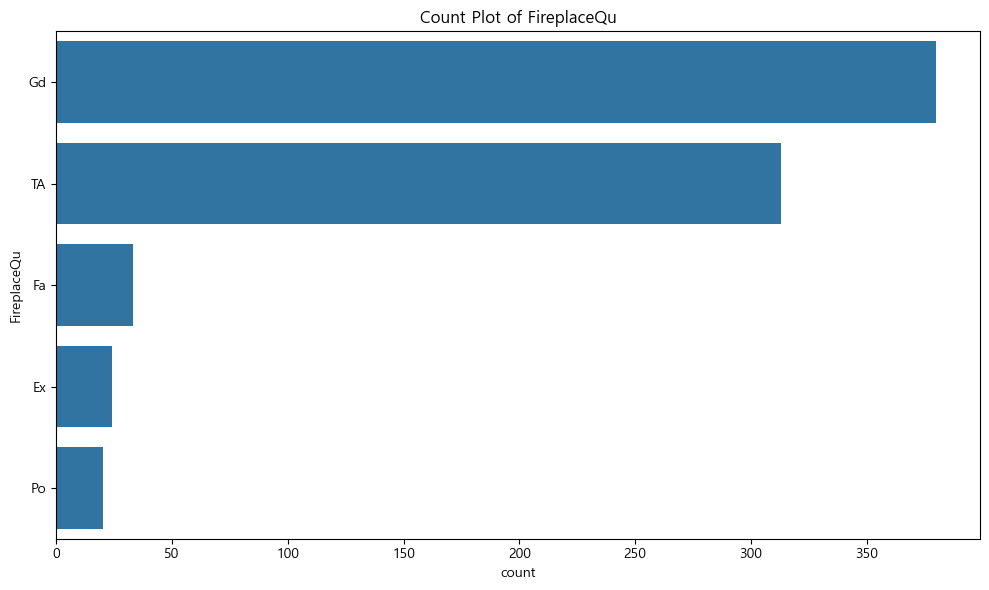

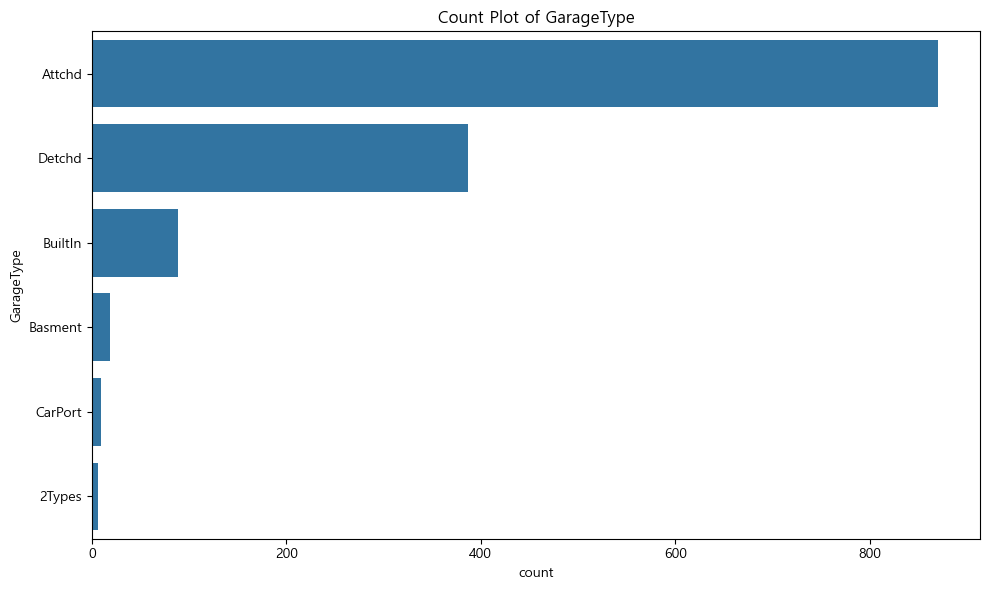

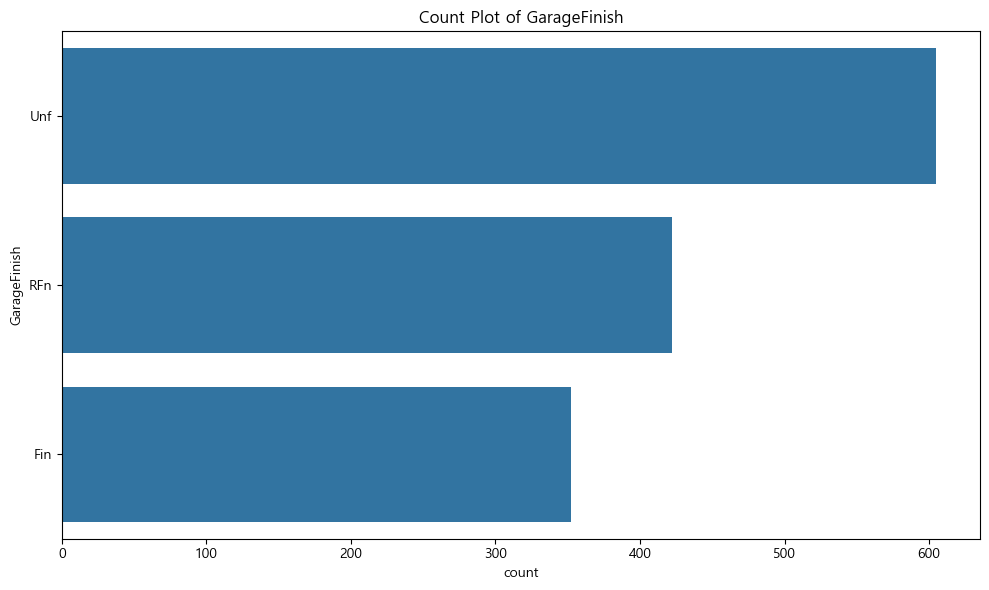

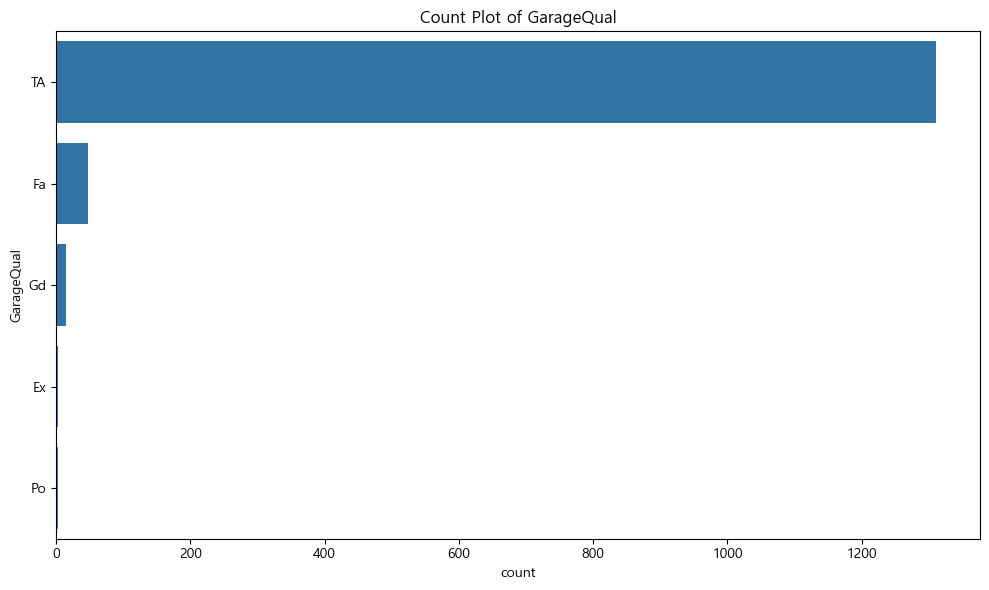

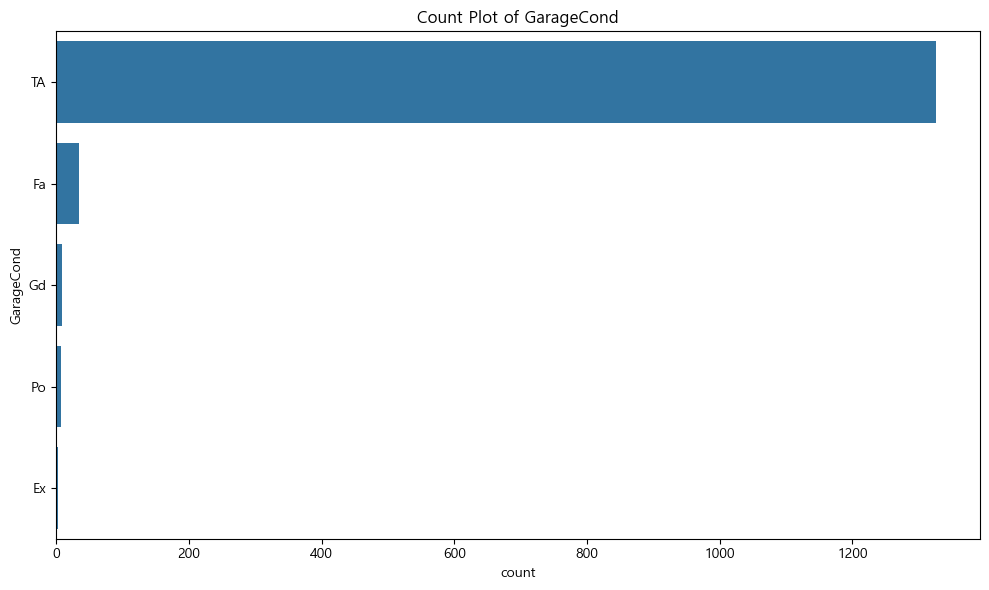

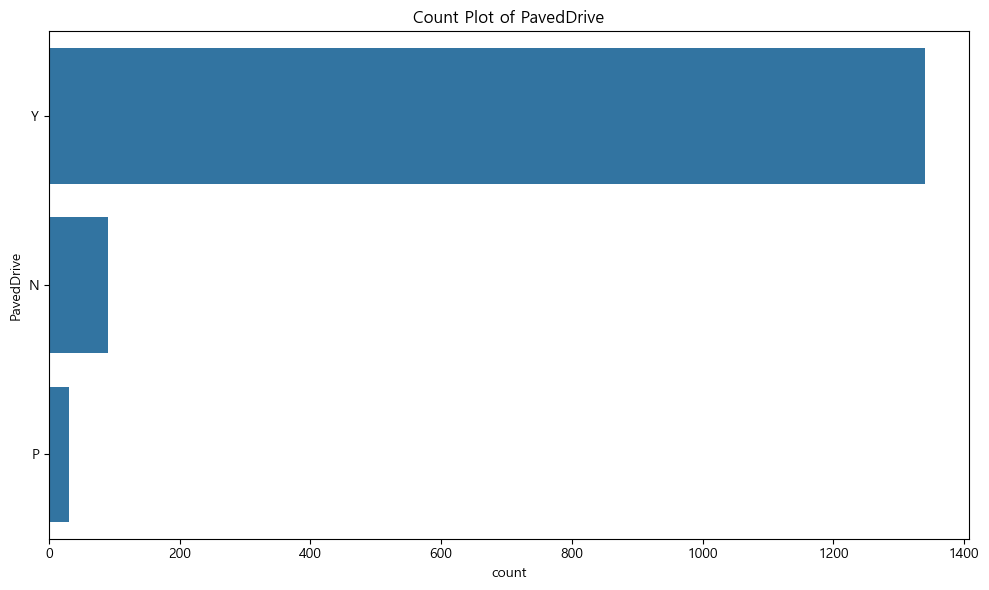

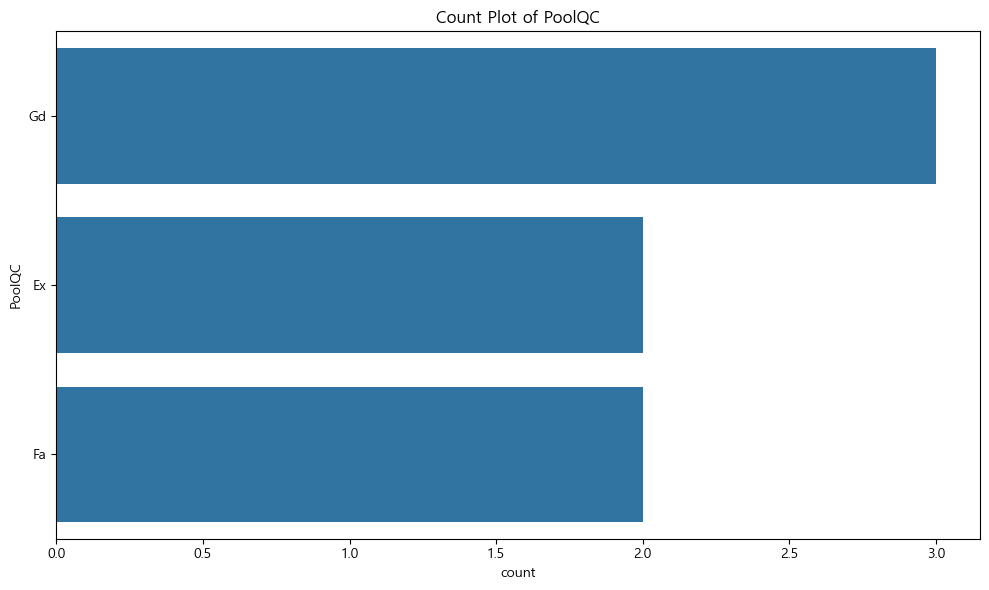

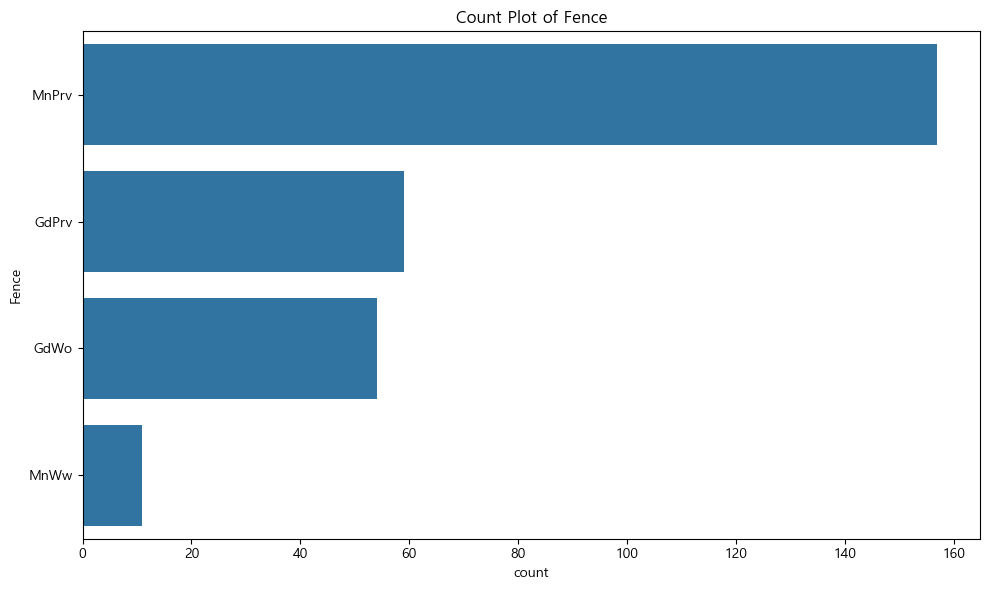

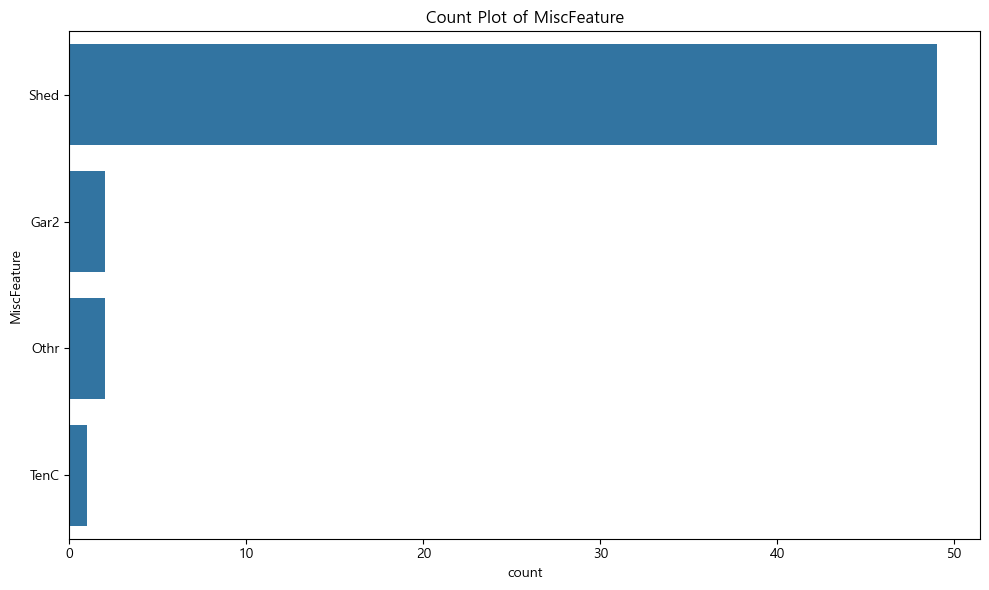

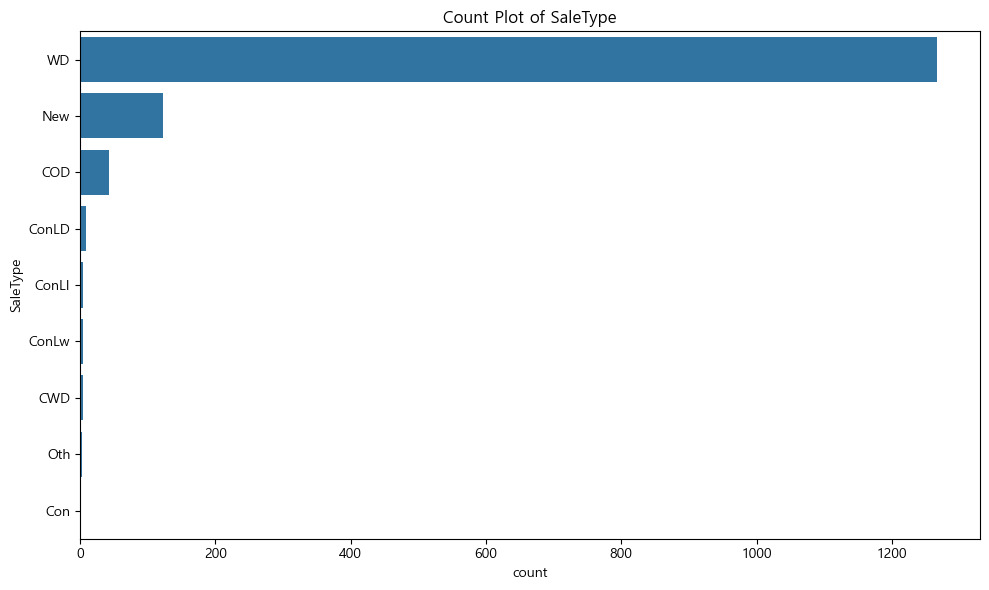

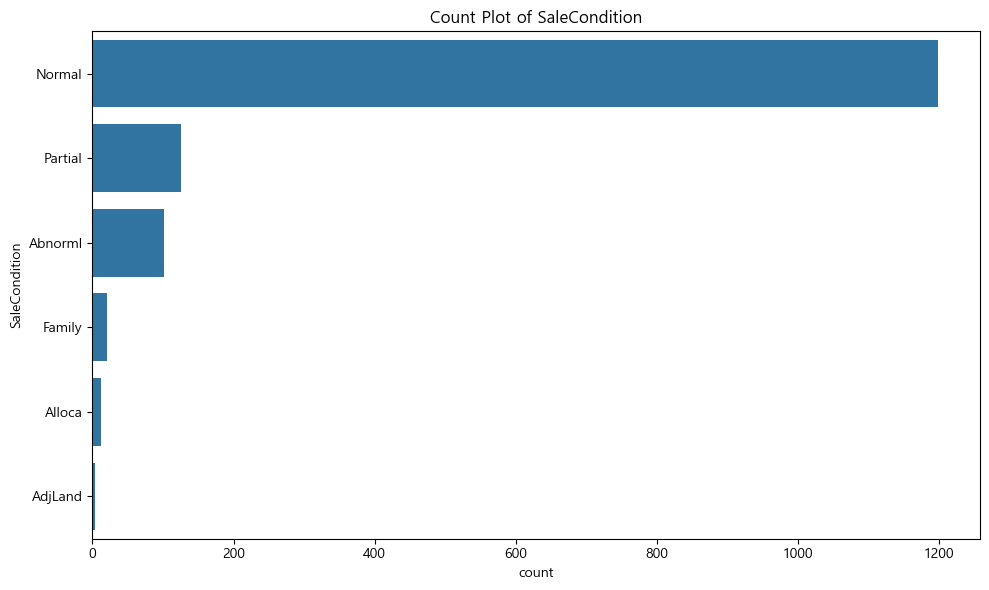

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df에서 data2의 특성들을 제외한 데이터
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# 각 범주형 변수마다 figure 생성
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # figsize를 적당히 설정
    
    # 빈도수 시각화 - 막대 그래프
    sns.countplot(y=df_cleaned[col], order=df_cleaned[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    
    plt.tight_layout()
    plt.show()


In [54]:
import pandas as pd

# df_cleaned의 결측값 갯수와 비율 계산
missing_values = df_cleaned.isnull().sum()
missing_values_percentage = (missing_values / len(df_cleaned)) * 100

# 결측값이 있는 열만 선택
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

# 결측값이 있는 열만 선택하고, 결측값의 개수에 따라 내림차순 정렬
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data = missing_data.sort_values(by='Missing Values', ascending=False)

print("결측값 정보:")
print(missing_data)


결측값 정보:
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
